In [1]:
def generate_harvard_citation(author,year,title,url,access_date):
    citation= f'{author},{year}.{title}..Available at: {url} [Accesed] {access_date}]'
    return citation

# Example usage
author = " Zach"
year = "2020"
title ='How to Perform a Box-Cox Transformation in Python'
url = "https://www.statology.org/box-cox-transformation-python/"
citation = generate_harvard_citation(author, year, title, url, access_date)
print(citation)

Table of Contents
1  Problem Definition
1.1  Project Overview
1.2  Problem Statement
2  Dataset Analysis
2.1  Importing Python libraries
2.2  Importing the data
2.3  Data Description and Exploratory Visualisations
2.3.1  Overview
2.3.2  Numerical features overview
2.4  Feature distribution by target attribute
2.4.1  Age
2.4.2  Education
2.4.3  Gender
2.4.4  Marital Status
2.4.5  Distance from Home
2.4.6  Department
2.4.7  Role and Work Conditions
2.4.8  Years at the Company
2.4.9  Years With Current Manager
2.4.10  Work-Life Balance Score
2.4.11  Pay/Salary Employee Information
2.4.12  Employee Satisfaction and Performance Information
2.5  Target Variable: Attrition
2.6  Correlation
2.7  EDA Concluding Remarks
3  Pre-processing Pipeline
3.1  Encoding
3.2  Feature Scaling
3.3  Splitting data into training and testing sets
4  Building Machine Learning Models
4.1  Baseline Algorithms
4.2  Logistic Regression
4.2.1  Fine-tuning
4.2.2  Evaluation
4.3  Random Forest Classifier
4.3.1  Fine-tuning
4.3.2  Evaluation
4.4  ROC Graphs
5  Concluding Remarks
5.1  Risk Category
5.2  Strategic Retention Plan

from IPython.display import HTML

HTML('''<script>

code_show=true;

function code_toggle() {

 if (code_show){

 $('div.input').hide();

 } else {

 $('div.input').show();

 }

 code_show = !code_show

}

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

1.1 Project Overview

As a data analyst, our task is to prepare and analyse the data set using appropriate data preparation,
statistical techniques and ML models. Our analysis will aim to identify any relationships or trends in the
data that can be used to improve employee satisfaction and productivity.

A study by the Center for American Progress  on employee turnover showed that replacing a worker costs around 20% of their compensation. Increased turnover can result in significant expenditures that can be avoided by providing workplace flexibility and earned sick days at little or no cost.

Thus, most firms still find employee replacement expensive. The time spent interviewing and finding a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee adjusts to the new workplace

1.2 Problem Statement

Understanding why and when employees depart might help retain them.The reasons people quit a job can help us create a retention plan to boost employee satisfaction and productivity.Step-by-step systematic approach employing a strategy that can be utilised for many ML problems. This project falls under "HR Anlytics" or "People Analytics".

This study aims to tackle the problem statement:

What are the factors behind former employees leaving the company?
What are the key signs of employee turnover?
What policies or tactics may be implemented based on the results to boost employee happiness and productivity? 

Since we have data on previous employees, this is a normal supervised classification problem with a binary label: 0 (current employee), 1 (former employee). We investigate the probability of an employee leaving the organisation (Y).

2. Dataset Analysis

2.1 Importing Libraries

In [2]:
# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [3]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
import plotly
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [4]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.base import clone
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.dummy import DummyClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, uniform

# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,precision_score
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [5]:
# importing misceallenous libraries
import os
import re
import sys
import timeit
import time
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
from tabulate import tabulate
# ip = get_ipython()
# ip.register_magics(jupyternotify.JupyterNotifyMagics)

2.2 Importing The Data

In [6]:
# Read Excel file
df_sourcefile = pd.read_csv('Employee_Attrition.csv')
print("Shape of dataframe is: {}".format(df_sourcefile.shape))

Shape of dataframe is: (1470, 35)


2.3  Data Description and Exploratory Visualisations

2.3.1  Overview

In [7]:
# Make a copy of the original source file
df_HR = df_sourcefile.copy()

# Select numerical columns
numerical_columns = df_HR.select_dtypes(include=['float64', 'int32']).columns
df_num = df_HR[numerical_columns]

# Select categorical columns
categorical_columns = df_HR.select_dtypes(include=['object']).columns
df_cat = df_HR[categorical_columns]

# Round numerical columns to 2 decimal points
df_num = df_num.round(2)

# Display the columns in each DataFrame
print("Numerical Columns:")
print(df_num.columns)

print("\nCategorical Columns:")
print(df_cat.columns)


Numerical Columns:
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Categorical Columns:
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [8]:
# Make a copy of the original sourcefile
df_HR = df_sourcefile.copy()

# Select numerical columns
numerical_columns= df_HR.select_dtypes(include=['float64','int32']).columns
df_num=df_HR[numerical_columns]
categorical_columns= df_HR.select_dtypes(include=['object']).columns
df_cat= df_HR[categorical_columns]

# Round numerical columns to 2 decimal points
df_num = df_num.round(2)


# Dataset columns
print('Numerical Columns:')
print(df_num.columns)

print("\nCategorical Columns")
print(df_cat.columns)

Numerical Columns:
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Categorical Columns
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [9]:
#  Columns by data type
df_HR.columns.to_series().groupby(df_HR.dtypes).groups

{float64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [10]:
# Dataset header
df_HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,2.146294,Male,93.827486,3.426960,2.464492,Sales Executive,3.397665,Single,6438.949336,20845.103714,7.077818,Y,Yes,9.898765,2.844897,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,3.470803,Male,52.304157,1.813458,1.788697,Research Scientist,1.584059,Married,4457.659622,24877.898697,1.114423,Y,No,NaN,4.120281,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,3.979420,Male,87.271332,1.877226,0.833488,Laboratory Technician,3.301009,Single,2124.545220,2262.942954,5.539591,Y,Yes,15.401596,2.781168,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,3.734705,Female,56.378982,2.932646,1.095372,Research Scientist,3.220844,Married,2771.699080,27189.905714,0.772793,NaN,Yes,9.757546,2.769576,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,1.079412,Male,40.433887,3.117739,0.937746,Laboratory Technician,1.697330,Married,3254.601575,17675.541599,10.118125,NaN,NaN,11.920147,3.282183,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


In [11]:
#  Information on columns
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   DailyRate                 1323 non-null   float64
 4   Department                1323 non-null   object 
 5   DistanceFromHome          1323 non-null   float64
 6   Education                 1323 non-null   float64
 7   EducationField            1323 non-null   object 
 8   EmployeeCount             1323 non-null   float64
 9   EmployeeNumber            1323 non-null   float64
 10  EnvironmentSatisfaction   1323 non-null   float64
 11  Gender                    1323 non-null   object 
 12  HourlyRate                1323 non-null   float64
 13  JobInvolvement            1323 non-null   float64
 14  JobLevel

2.3.2  Numerical & Categotical features overview

In [12]:
# Summary of each numerical attribute
df_HR.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1323.0,36.64,9.88,14.54,29.62,34.95,42.75,69.40
DailyRate,1323.0,802.03,414.03,86.83,456.48,782.96,1130.58,1784.39
DistanceFromHome,1323.0,9.09,8.18,0.75,2.15,6.92,13.58,33.68
Education,1323.0,2.92,1.07,0.77,2.12,3.02,3.70,6.29
EmployeeCount,1323.0,1.00,0.10,0.63,0.93,1.00,1.07,1.29
EmployeeNumber,1323.0,1026.68,610.48,1.05,501.85,1022.03,1533.81,2530.92
EnvironmentSatisfaction,1323.0,2.73,1.13,0.76,1.89,2.89,3.68,5.25
HourlyRate,1323.0,65.65,21.47,23.86,47.70,64.93,83.04,123.20
JobInvolvement,1323.0,2.74,0.77,0.72,2.18,2.86,3.18,5.24
JobLevel,1323.0,2.06,1.13,0.72,1.05,1.94,2.61,5.94


In [13]:
# we have used describe function on oyr day_night column
df_HR.describe(include = ['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1323,1323,1323,1323,1323,1323,1323,1323,1323
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1065,890,824,504,783,281,596,1323,929


In [14]:
attrition_counts = df_HR['Attrition'].value_counts()

print("Value Counts for 'Attrition' Column:")
print(attrition_counts)

Value Counts for 'Attrition' Column:
Attrition
No     1065
Yes     258
Name: count, dtype: int64


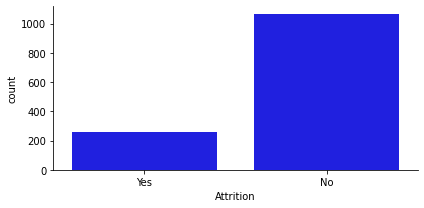

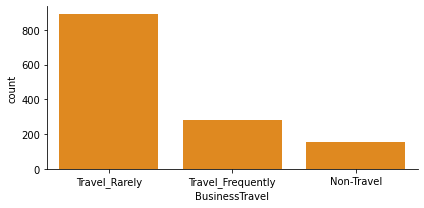

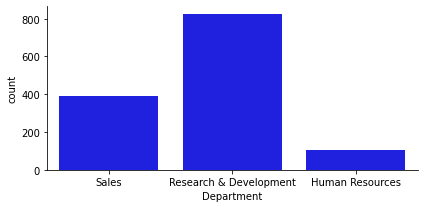

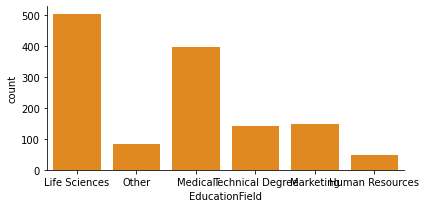

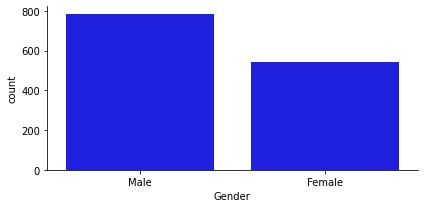

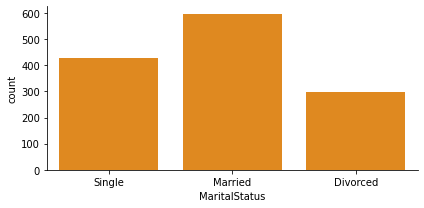

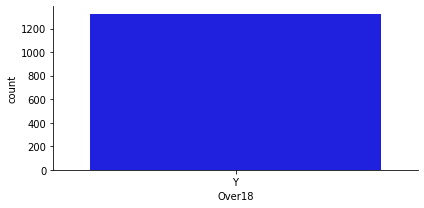

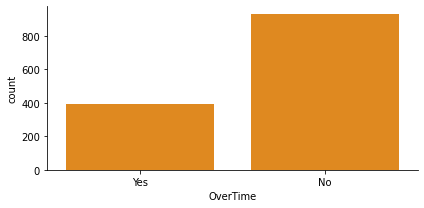

In [15]:
# Create a countplot for all the categorical data
sns.catplot(x='Attrition', kind='count', data=df_HR, height=3, aspect=2,color='blue')
sns.catplot(x='BusinessTravel', kind='count', data=df_HR, height=3, aspect=2,color='darkorange')
sns.catplot(x='Department', kind='count', data=df_HR, height=3, aspect=2,color='blue')
sns.catplot(x='EducationField', kind='count', data=df_HR, height=3, aspect=2,color='darkorange')
sns.catplot(x='Gender', kind='count', data=df_HR, height=3, aspect=2,color='blue')
sns.catplot(x='MaritalStatus', kind='count', data=df_HR, height=3, aspect=2,color='darkorange')
sns.catplot(x='Over18', kind='count', data=df_HR, height=3, aspect=2,color='blue')
sns.catplot(x='OverTime', kind='count', data=df_HR, height=3, aspect=2,color='darkorange')


An observation from the countplots the attrition class our target variable is imbalanced. this can problems for a machine learning models and lead to subotimal outcomes due to biased model training, poor generalization & model evaluation challenges.
The over 18 column only has one value we may consider this to be redundant as it contains only one value & thus has little or no predictive value.

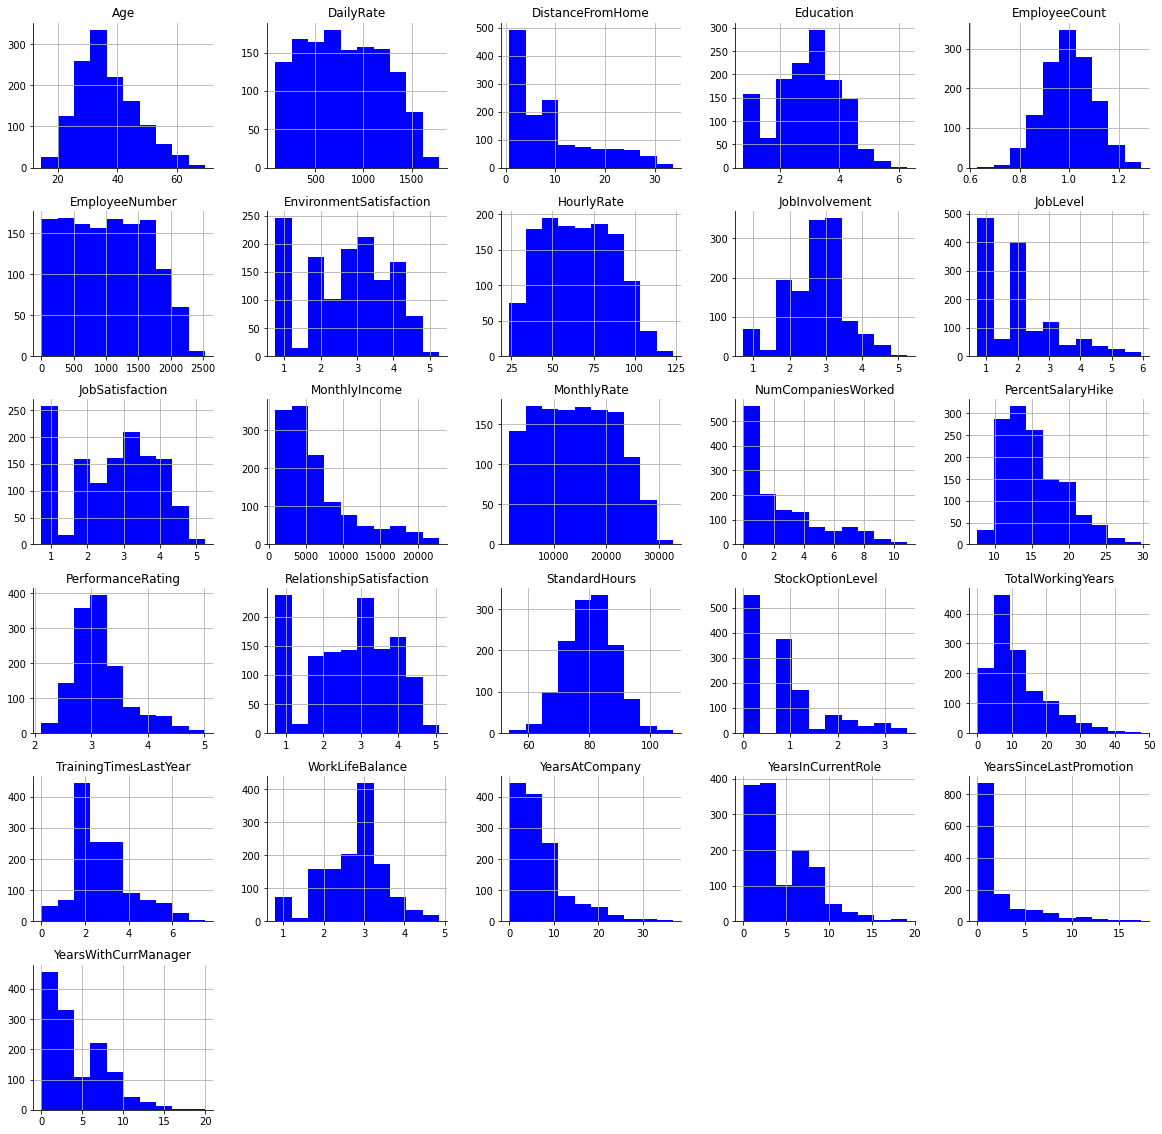

In [16]:
# Create a Histogram For all the Numerical Data
df_HR.hist(figsize=(20,20), color='b')
sns.despine()
plt.grid(False)
plt.show()

A few observations can be made based on the information and histograms for numerical features:
Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.
Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.
EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.
Employee Number is likely to be a unique identifier for employees given the feature's uniform distribution

In [17]:
# Discover missing values in the datbase
df_HR.isnull().values.any()# this code will tell me if i have any null values in my dataset

True

In [18]:
# Check missing values in the datbase
df_HR.isnull().sum() # this code will tell me where my missing values are

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

In [19]:
# we use this code to drop missing values axis = 0 is rows all rows with na wil be dropped
new_df=df_HR.dropna (axis=0) 

new_df.isnull().values.any()

False

In [20]:
#  Check dataset if we drop all missing values
new_df.shape

(40, 35)

In [21]:
# Create a summary of the data before Imputation
print('Before  Median Imputation:')
summary_before_imputation= df_num.describe().round(2).transpose()
print(summary_before_imputation)

Before  Median Imputation:
                           count      mean      std      min      25%  \
Age                       1323.0     36.64     9.88    14.54    29.62   
DailyRate                 1323.0    802.03   414.03    86.83   456.48   
DistanceFromHome          1323.0      9.09     8.18     0.75     2.15   
Education                 1323.0      2.92     1.07     0.77     2.12   
EmployeeCount             1323.0      1.00     0.10     0.63     0.93   
EmployeeNumber            1323.0   1026.68   610.48     1.05   501.86   
EnvironmentSatisfaction   1323.0      2.73     1.13     0.76     1.90   
HourlyRate                1323.0     65.65    21.47    23.86    47.70   
JobInvolvement            1323.0      2.74     0.77     0.72     2.18   
JobLevel                  1323.0      2.06     1.13     0.72     1.05   
JobSatisfaction           1323.0      2.72     1.15     0.72     1.85   
MonthlyIncome             1323.0   6544.72  4766.58   891.48  2961.84   
MonthlyRate             

In [22]:
# Impute  with the median as a first process
median_imputed_df= df_num.fillna(df_num.median())

In [23]:
# Create a summary of the data after Imputation
print('After  Median Imputation:')
summary_after_imputation= median_imputed_df.describe().round(2).transpose()
print(summary_after_imputation)

After  Median Imputation:
                           count      mean      std      min      25%  \
Age                       1470.0     36.47     9.39    14.54    30.36   
DailyRate                 1470.0    800.12   392.81    86.83   502.68   
DistanceFromHome          1470.0      8.87     7.79     0.75     2.26   
Education                 1470.0      2.93     1.02     0.77     2.20   
EmployeeCount             1470.0      1.00     0.09     0.63     0.94   
EmployeeNumber            1470.0   1026.21   579.13     1.05   539.36   
EnvironmentSatisfaction   1470.0      2.74     1.07     0.76     1.96   
HourlyRate                1470.0     65.58    20.37    23.86    49.03   
JobInvolvement            1470.0      2.75     0.73     0.72     2.26   
JobLevel                  1470.0      2.05     1.07     0.72     1.07   
JobSatisfaction           1470.0      2.73     1.09     0.72     1.94   
MonthlyIncome             1470.0   6385.95  4546.84   891.48  3177.68   
MonthlyRate              

In [24]:
# Create a comparison for before & after  median imputaion
absolute_difference_mean = abs(median_imputed_df.mean() - df_num.mean())
absolute_difference_median = abs(median_imputed_df.median() - df_num.median())
percentage_difference_std = abs((median_imputed_df.std() - df_num.std()) / df_num.std()) * 100

# Create a DataFrame to store the comparison results
comparison_results = pd.DataFrame({
    'Absolute Difference (Mean)': absolute_difference_mean,
    'Absolute Difference (Median)': absolute_difference_median,
    'Percentage Difference (Std)': percentage_difference_std
     })

# Display comparison results
print('Comparison Results For Median Imputation:')
print(comparison_results)

Comparison Results For Median Imputation:
                          Absolute Difference (Mean)  \
Age                                         0.168526   
DailyRate                                   1.906995   
DistanceFromHome                            0.217097   
Education                                   0.009636   
EmployeeCount                               0.000088   
EmployeeNumber                              0.464924   
EnvironmentSatisfaction                     0.016356   
HourlyRate                                  0.071769   
JobInvolvement                              0.011701   
JobLevel                                    0.011823   
JobSatisfaction                             0.018460   
MonthlyIncome                             158.764844   
MonthlyRate                                10.604472   
NumCompaniesWorked                          0.094450   
PercentSalaryHike                           0.079578   
PerformanceRating                           0.008928   
Relati

<function matplotlib.pyplot.show(close=None, block=None)>

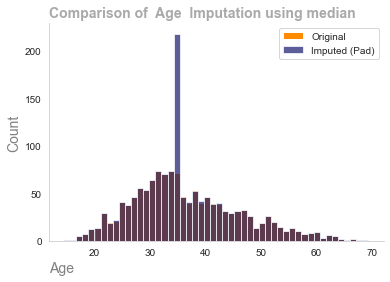

In [25]:
# Compare in a histogram the two imputations methods
original_age_data=df_HR['Age']
imputed_age_data=median_imputed_df['Age']
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
plt.hist(original_age_data,bins=50,color="darkorange", label='Original')
plt.hist(imputed_age_data,bins=50,color="midnightblue",alpha=0.7 ,label='Imputed (Pad)')
plt.xlabel('Age',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Comparison of  Age  Imputation using median',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend()
sns.despine()
plt.grid(False)
plt.show

In [26]:
# create a differnt imputation Method
pad_imputed_df= df_num.fillna(method='pad')

In [27]:
# Create a comparison for before & after  pad imputaion
absolute_difference_mean = abs(pad_imputed_df.mean() - df_num.mean())
absolute_difference_median = abs(pad_imputed_df.median() - df_num.median())
percentage_difference_std = abs((pad_imputed_df.std() - df_num.std()) / df_num.std()) * 100

# Create a DataFrame to store the comparison results
comparison_results = pd.DataFrame({
    'Absolute Difference (Mean)': absolute_difference_mean,
    'Absolute Difference (Median)': absolute_difference_median,
    'Percentage Difference (Std)': percentage_difference_std
     })

# Display comparison results
print('Comparison Results:')
print(comparison_results)

Comparison Results:
                          Absolute Difference (Mean)  \
Age                                         0.130998   
DailyRate                                   5.732611   
DistanceFromHome                            0.076366   
Education                                   0.002800   
EmployeeCount                               0.000293   
EmployeeNumber                              2.856522   
EnvironmentSatisfaction                     0.010188   
HourlyRate                                  0.184300   
JobInvolvement                              0.002428   
JobLevel                                    0.009354   
JobSatisfaction                             0.003642   
MonthlyIncome                              18.740633   
MonthlyRate                                27.075302   
NumCompaniesWorked                          0.012156   
PercentSalaryHike                           0.034238   
PerformanceRating                           0.000996   
RelationshipSatisfaction    

<function matplotlib.pyplot.show(close=None, block=None)>

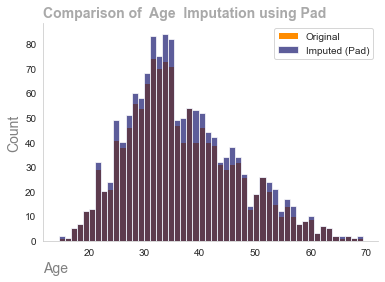

In [28]:
# Compare in a histogram the two imputations methods
original_age_data=df_HR['Age']
imputed_age_data=pad_imputed_df['Age']
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
plt.hist(original_age_data,bins=50,color="darkorange", label='Original')
plt.hist(imputed_age_data,bins=50,color="midnightblue",alpha=0.7 ,label='Imputed (Pad)')
plt.xlabel('Age',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Comparison of  Age  Imputation using Pad',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend()
sns.despine()
plt.grid(False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

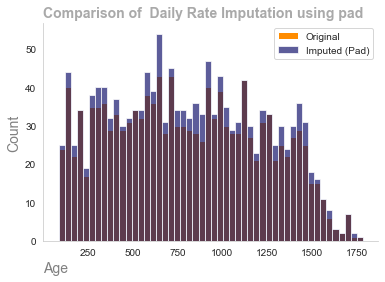

In [29]:
# Compare in a histogram the two imputations methods
original_age_data=df_HR['DailyRate']
imputed_age_data=pad_imputed_df['DailyRate']
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
plt.hist(original_age_data,bins=50,color="darkorange", label='Original')
plt.hist(imputed_age_data,bins=50,color="midnightblue",alpha=0.7 ,label='Imputed (Pad)')
plt.xlabel('Age',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Comparison of  Daily Rate Imputation using pad',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend()
sns.despine()
plt.grid(False)
plt.show

In [30]:
# Use median to impute data
df_num["DailyRate"].fillna(df_num["DailyRate"].median()) 

0        990.11
1        276.78
2       1204.16
3       1352.75
4        485.05
         ...   
1465     914.06
1466     574.68
1467     151.51
1468     995.98
1469     703.68
Name: DailyRate, Length: 1470, dtype: float64

In [31]:
# Calutame mode values befor & after imputation 
daily_median_imp= df_num['DailyRate'].median()
daily_median_org= df_HR['DailyRate'].median()

print(f" The median of the 'Daily Income after median imputaion is: {daily_median_imp}")
print(f" The median of the 'Daily Income original is: {daily_median_org}")

 The median of the 'Daily Income after median imputaion is: 782.96
 The median of the 'Daily Income original is: 782.9587046101927


<function matplotlib.pyplot.show(close=None, block=None)>

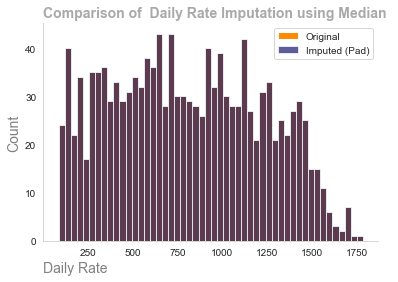

In [32]:
# Creat histograms of oringinal & Imputed
original_daily_data=df_HR['DailyRate']
imputed_daily_data=df_num['DailyRate']
sns.set_style('whitegrid')

# Histogram  
plt.figure(figsize=(6,4))
plt.hist(original_daily_data,bins=50,color="darkorange", label='Original')
plt.hist(imputed_daily_data,bins=50,color="midnightblue",alpha=0.7 ,label='Imputed (Pad)')
plt.xlabel('Daily Rate',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Comparison of  Daily Rate Imputation using Median ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend()
sns.despine()
plt.grid(False)
plt.show

In [33]:
# Use median to impute data
df_num["MonthlyIncome"].fillna(df_num["MonthlyIncome"].median()) 

0       6438.95
1       4457.66
2       2124.55
3       2771.70
4       3254.60
         ...   
1465    2806.95
1466    4957.07
1467    6609.84
1468    5585.30
1469    5188.88
Name: MonthlyIncome, Length: 1470, dtype: float64

In [34]:
# Calutame mode values befor & after imputation 
monthly_mean_imp= df_num['MonthlyIncome'].median()
monthly_mean_org= df_HR['MonthlyIncome'].median()

print(f" The median of the 'Monthly Income after imputaion is: {monthly_mean_imp}")
print(f" The median of the 'Monthly Income original is: {monthly_mean_org}")

 The median of the 'Monthly Income after imputaion is: 4957.07
 The median of the 'Monthly Income original is: 4957.070474605795


<function matplotlib.pyplot.show(close=None, block=None)>

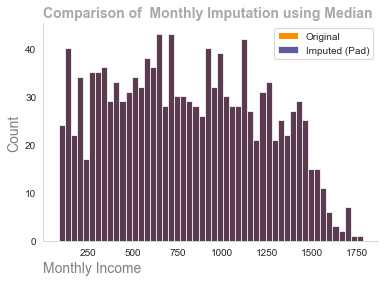

In [35]:
# Creat histograms of oringinal & Imputed
original_monthly_data=df_HR['MonthlyIncome']
imputed_monthly_data=df_num['MonthlyIncome']
sns.set_style('whitegrid')


# Histogram 
plt.figure(figsize=(6,4))
plt.hist(original_age_data,bins=50,color="darkorange", label='Original')
plt.hist(imputed_daily_data,bins=50,color="midnightblue",alpha=0.7 ,label='Imputed (Pad)')
plt.xlabel('Monthly Income',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Comparison of  Monthly Imputation using Median ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend()
sns.despine()
plt.grid(False)
plt.show

In [36]:
# Use median to impute data
df_num["MonthlyRate"].fillna(df_num["MonthlyRate"].median()) 

0       20845.10
1       24877.90
2        2262.94
3       27189.91
4       17675.54
          ...   
1465    13077.12
1466    21026.15
1467    14258.29
1468    11837.89
1469    10276.02
Name: MonthlyRate, Length: 1470, dtype: float64

In [37]:
# Calutame mode values befor & after imputation 
monthly_mean_imp= df_num['MonthlyRate'].median()
monthly_mean_org= df_HR['MonthlyRate'].median()

print(f" The median of the 'Monthly Rate after imputaion is: {monthly_mean_imp}")
print(f" The median of the 'Monthly Rate original is: {monthly_mean_org}")

 The median of the 'Monthly Rate after imputaion is: 14258.29
 The median of the 'Monthly Rate original is: 14258.2933653424


<function matplotlib.pyplot.show(close=None, block=None)>

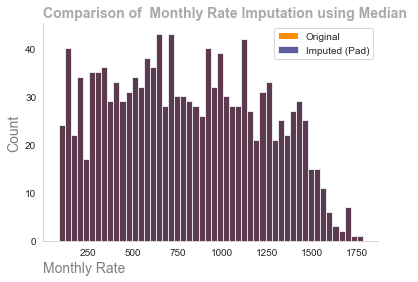

In [38]:
# Creat histograms of oringinal & Imputed
original_monthly_data=df_HR['MonthlyRate']
imputed_monthly_data=df_num['MonthlyRate']
sns.set_style('whitegrid')


# Histogram 
plt.figure(figsize=(6,4))
plt.hist(original_age_data,bins=50,color="darkorange", label='Original')
plt.hist(imputed_daily_data,bins=50,color="midnightblue",alpha=0.7 ,label='Imputed (Pad)')
plt.xlabel('Monthly Rate',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Comparison of  Monthly Rate Imputation using Median ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend()
sns.despine()
plt.grid(False)
plt.show

In [39]:
df_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [40]:

# Create a list to us pad to imputate features
columns_to_pad=['Age',  'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

columns_to_median= ['DailyRate','MonthlyIncome','MonthlyRate']

pad_imputed_df= df_num[columns_to_pad].fillna(method='pad',axis=0)

median_imputed_df = df_num[columns_to_median].fillna(df_num[columns_to_median].median())

final_imputed_df = pd.concat([df_num.drop(columns=columns_to_pad + columns_to_median),pad_imputed_df,median_imputed_df],
                            axis=1)

In [41]:
final_imputed_df.head()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate
0,41.92,1.02,1.77,1.03,1.05,2.15,93.83,3.43,2.46,3.40,7.08,9.90,2.84,1.01,95.61,0.00,8.06,0.00,1.05,5.80,3.99,0.00,4.59,990.11,6438.95,20845.10
1,51.59,1.02,1.04,0.94,2.11,3.47,52.30,1.81,1.79,1.58,1.11,9.90,4.12,4.31,85.37,1.10,8.97,3.26,2.53,10.07,7.94,1.03,5.90,276.78,4457.66,24877.90
2,33.13,2.20,2.12,0.81,4.01,3.98,87.27,1.88,0.83,3.30,5.54,15.40,2.78,2.33,76.25,0.00,8.43,3.00,2.92,0.00,0.00,0.00,0.00,1204.16,2124.55,2262.94
3,34.71,2.94,3.67,0.82,4.59,3.73,56.38,2.93,1.10,3.22,0.77,9.76,2.77,3.03,75.89,0.00,7.66,2.86,3.12,8.44,5.56,2.85,0.00,1352.75,2771.70,27189.91
4,24.79,1.99,1.12,0.82,7.23,1.08,40.43,3.12,0.94,1.70,10.12,11.92,3.28,3.03,72.67,0.95,6.24,2.81,3.11,2.04,1.97,2.50,2.22,485.05,3254.60,17675.54


In [42]:
#  missing values 
final_imputed_df.isnull().sum() # this code will tell me where my missing values are

Age                         0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
DailyRate                   0
MonthlyIncome               0
MonthlyRate                 0
dtype: int64

In [43]:
# Catgotical columns
df_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [44]:
# categorical head of data
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,NaN,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,NaN,NaN


In [45]:
# Drop over 18 column as it only contains one value and has little predictive power ans is a redundant feature
df_cat.drop(columns='Over18',inplace=True)

In [46]:
# categorical head of data
df_cat.head(1)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Yes


In [47]:
# we use this code to drop missing values axis = 0 is rows all rows with na wil be dropped
new_df=df_cat.dropna (axis=0) 

new_df.isnull().values.any()

False

In [48]:
# Create new shape
new_df.shape

(618, 8)

In [49]:
# missing values 
df_cat.isnull().sum() # this code will tell me where my missing values are

Attrition         147
BusinessTravel    147
Department        147
EducationField    147
Gender            147
JobRole           147
MaritalStatus     147
OverTime          147
dtype: int64

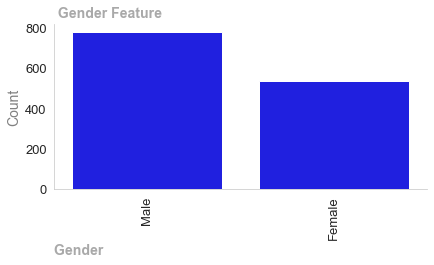

In [50]:
# Create catplot for feature
sns.catplot(x='Gender', kind='count', data=df_cat, height=3, aspect=2,color='blue')

# Adding x_axis & ylabel label
plt.xlabel('Gender ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title(' Gender Feature',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

df_cat["Gender"].fillna(df_cat["Gender"].mode()) # if data is skewed we use median

In [51]:
# check  where my missing values are in categorical column
df_cat.isnull().sum() 

Attrition         147
BusinessTravel    147
Department        147
EducationField    147
Gender            147
JobRole           147
MaritalStatus     147
OverTime          147
dtype: int64

In [52]:
# Creat a new feature no gender
df_cat["Gender"].fillna("No Gender", inplace= True)

In [53]:
# Have a look at the new feature
unique_values=df_cat['Gender'].unique()
print(unique_values)

['Male' 'Female' 'No Gender']


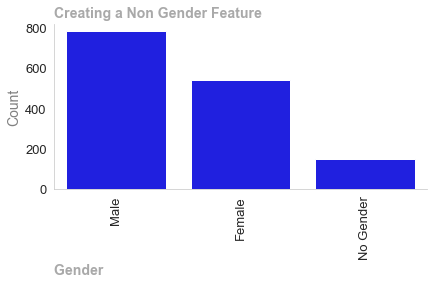

In [54]:
# Create catplot for feature
sns.catplot(x='Gender', kind='count', data=df_cat, height=3, aspect=2,color='blue')

# Adding x_axis & ylabel label
plt.xlabel('Gender ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Creating a Non Gender Feature',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

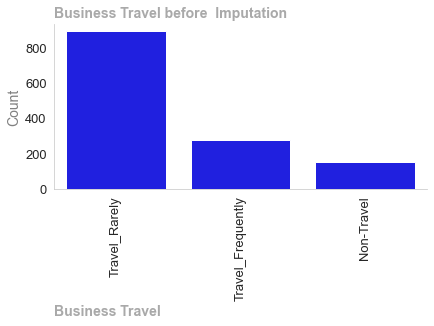

In [55]:
# Create catplot for feature
sns.catplot(x='BusinessTravel', kind='count', data=df_cat, height=3, aspect=2,color='blue')
 
# Adding x_axis & ylabel label
plt.xlabel('Business Travel',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Business Travel before  Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

In [56]:
# Unique values for the dataset
unique_values=df_cat['BusinessTravel'].unique()
print(unique_values)

['Travel_Rarely' 'Travel_Frequently' nan 'Non-Travel']


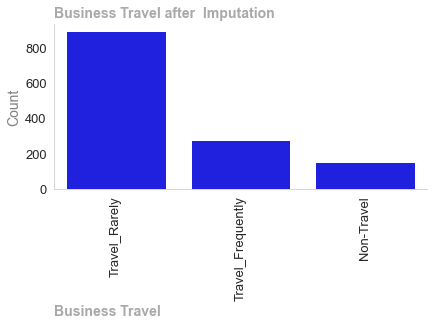

In [57]:
# Create catplot for feature
sns.catplot(x='BusinessTravel', kind='count', data=df_cat, height=3, aspect=2,color='blue')
 
# Adding x_axis & ylabel label
plt.xlabel('Business Travel',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Business Travel after  Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

In [58]:
# Use mode to impute categorical data
df_cat["BusinessTravel"].fillna(df_cat["BusinessTravel"].mode().iloc[0], inplace=True) # if data is skewed we use median

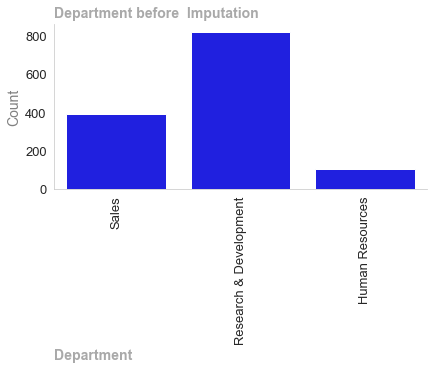

In [59]:
# Create catplot for feature
sns.catplot(x='Department', kind='count', data=df_cat, height=3, aspect=2,color='blue')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Department',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Department before  Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

In [60]:
# Use mode to impute categorical data
df_cat["Department"].fillna(df_cat["Department"].mode().iloc[0], inplace=True) # if data is skewed we use median

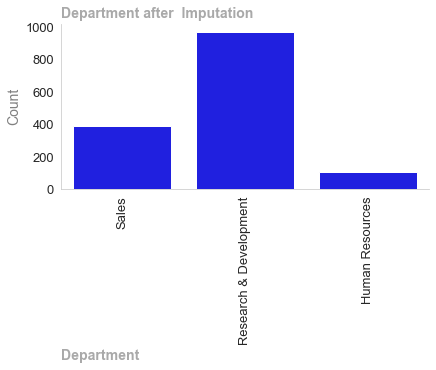

In [61]:
# Create catplot for feature
sns.catplot(x='Department', kind='count', data=df_cat, height=3, aspect=2,color='blue')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Department',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Department after  Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

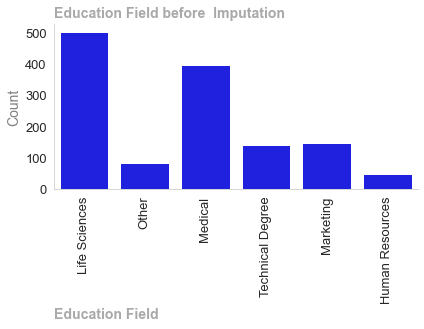

In [62]:
# Create catplot for feature
sns.catplot(x='EducationField', kind='count', data=df_cat, height=3, aspect=2,color='blue')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Education Field',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Education Field before  Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

In [63]:
# Use mode to impute categorical data
df_cat["EducationField"].fillna(df_cat["EducationField"].mode().iloc[0], inplace=True) # if data is skewed we use median

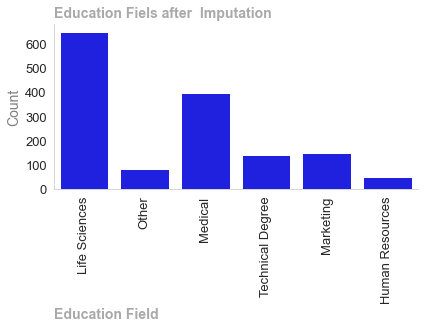

In [64]:
# Create catplot for feature
sns.catplot(x='EducationField', kind='count', data=df_cat, height=3, aspect=2,color='blue')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Education Field',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Education Fiels after  Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

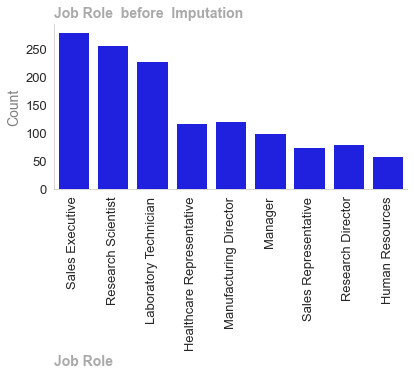

In [65]:
# Create catplot for feature
sns.catplot(x='JobRole', kind='count', data=df_cat, height=3, aspect=2,color='blue')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Job Role',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Job Role  before  Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

In [66]:
# Use mode to impute categorical data
df_cat["JobRole"].fillna(df_cat["JobRole"].mode().iloc[0], inplace=True) # if data is skewed we use median

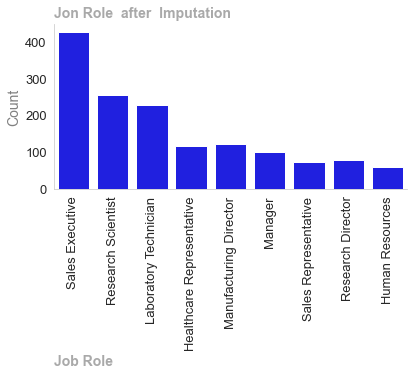

In [67]:
# Create catplot for feature
sns.catplot(x='JobRole', kind='count', data=df_cat, height=3, aspect=2,color='blue')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Job Role',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Jon Role  after  Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

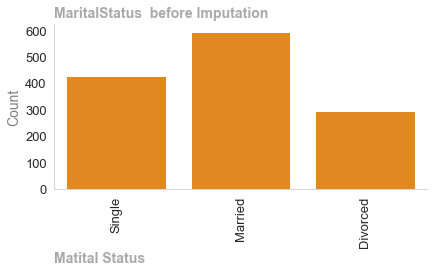

In [68]:
# Create catplot for feature
sns.catplot(x='MaritalStatus', kind='count', data=df_HR, height=3, aspect=2,color='darkorange')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Matital Status',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('MaritalStatus  before Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()


In [69]:
# Use mode to impute categorical data
df_cat["MaritalStatus"].fillna(df_cat["MaritalStatus"].mode().iloc[0], inplace=True)

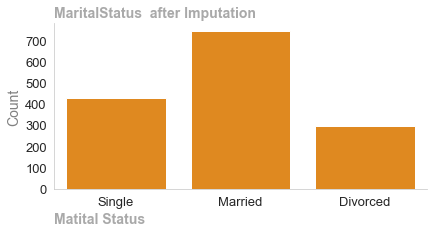

In [70]:
# Create catplot for feature
sns.catplot(x='MaritalStatus', kind='count', data=df_cat, height=3, aspect=2,color='darkorange')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Matital Status',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('MaritalStatus  after Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

plt.show()

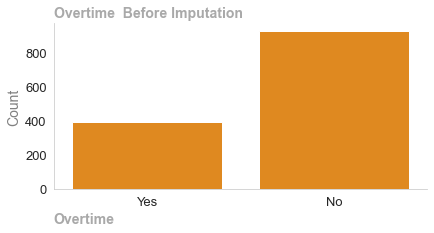

In [71]:
# Create catplot for feature
sns.catplot(x='OverTime', kind='count', data=df_HR, height=3, aspect=2,color='darkorange')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Overtime',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Overtime  Before Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()


In [72]:
# Use mode to impute categorical data
df_cat["OverTime"].fillna(df_cat["OverTime"].mode().iloc[0], inplace=True) # if data is skewed we use median

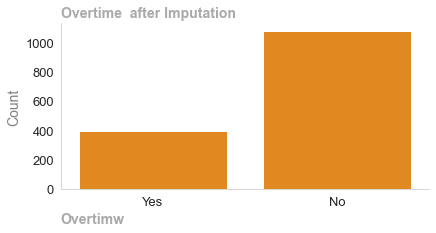

In [73]:
# Create catplot for feature
sns.catplot(x='OverTime', kind='count', data=df_cat, height=3, aspect=2,color='darkorange')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Overtimw',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Overtime  after Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

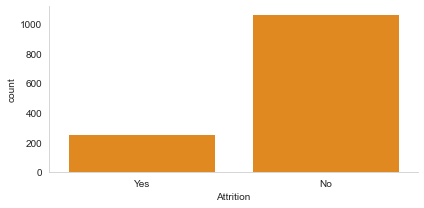

In [74]:
sns.catplot(x='Attrition', kind='count', data=df_HR, height=3, aspect=2,color='darkorange')
# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

In [75]:
# Use mode to impute categorical data
df_cat["Attrition"].fillna(df_cat["Attrition"].mode().iloc[0], inplace=True)

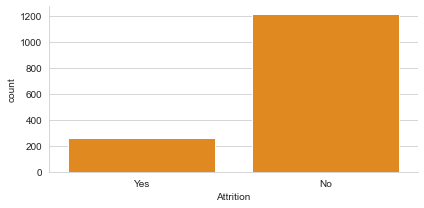

In [76]:
sns.catplot(x='Attrition', kind='count', data=df_cat, height=3, aspect=2,color='darkorange')
plt.show()

In [77]:
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [78]:
# missing values 
df_cat.isnull().sum() 

Attrition         0
BusinessTravel    0
Department        0
EducationField    0
Gender            0
JobRole           0
MaritalStatus     0
OverTime          0
dtype: int64

In [79]:
df_cat.head(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


df_cat_encoded.columns

df_cat=df_cat_encoded

In [80]:
final_imputed_df.head(1)

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate
0,41.92,1.02,1.77,1.03,1.05,2.15,93.83,3.43,2.46,3.4,7.08,9.9,2.84,1.01,95.61,0.0,8.06,0.0,1.05,5.8,3.99,0.0,4.59,990.11,6438.95,20845.1


In [81]:
# use concat function to add cleaned data back to one dataframe
df_new= pd.concat([df_cat,final_imputed_df], axis=1)

In [82]:
# create a copy of df_new and df_stat
df_stat=df_new.copy()

In [83]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
num_col = list(final_imputed_df.columns)
for col in num_col:
    final_imputed_df[col] = final_imputed_df[col].astype(float)
    final_imputed_df[[col]] = scaler.fit_transform(final_imputed_df[[col]])
final_imputed_dfd=final_imputed_df.round(2)
final_imputed_df.head()

#  Hamza b,2018.Building an Employee Churn Model in Python to Develop a Strategic Retention Plan..Available at: https://medium.com/towards-data-science/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d [Accesed] 14-12-2023]

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate
0,0.499089,0.008199,0.181159,0.606061,0.000000,0.309577,0.704349,0.599558,0.333333,0.591611,0.651934,0.100362,0.249135,0.066362,0.780369,0.000000,0.169186,0.000000,0.061576,0.157395,0.209010,0.000000,0.229730,0.532105,0.252542,0.618184
1,0.675355,0.008199,0.048913,0.469697,0.000419,0.603563,0.286290,0.241150,0.204981,0.189845,0.102210,0.100362,0.692042,0.821510,0.589289,0.317003,0.188287,0.434667,0.426108,0.273270,0.415925,0.059641,0.295295,0.111896,0.162346,0.747506
2,0.338863,0.044033,0.244565,0.272727,0.001170,0.717149,0.638313,0.256637,0.021073,0.569536,0.510129,0.349005,0.228374,0.368421,0.419108,0.000000,0.176952,0.400000,0.522167,0.000000,0.000000,0.000000,0.000000,0.658198,0.056134,0.022301
3,0.367663,0.066505,0.525362,0.287879,0.001399,0.661470,0.327361,0.488938,0.072797,0.551876,0.070902,0.094033,0.224913,0.528604,0.412390,0.000000,0.160789,0.381333,0.571429,0.229037,0.291252,0.165026,0.000000,0.745729,0.085595,0.821647
4,0.186839,0.037656,0.063406,0.287879,0.002443,0.071269,0.166801,0.530973,0.042146,0.216336,0.931860,0.191682,0.401384,0.528604,0.352305,0.273775,0.130982,0.374667,0.568966,0.055360,0.103195,0.144760,0.111111,0.234584,0.107578,0.516545


In [84]:
# combined dataframe head
df_new.head(1)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Yes,41.92,1.02,1.77,1.03,1.05,2.15,93.83,3.43,2.46,3.4,7.08,9.9,2.84,1.01,95.61,0.0,8.06,0.0,1.05,5.8,3.99,0.0,4.59,990.11,6438.95,20845.1


In [85]:
# check dataframe missing values
df_new.isnull().sum() 

Attrition                   0
BusinessTravel              0
Department                  0
EducationField              0
Gender                      0
JobRole                     0
MaritalStatus               0
OverTime                    0
Age                         0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
DailyRate                   0
MonthlyIncome               0
MonthlyRat

In [86]:
# check shape of the 
df_new.shape

(1470, 34)

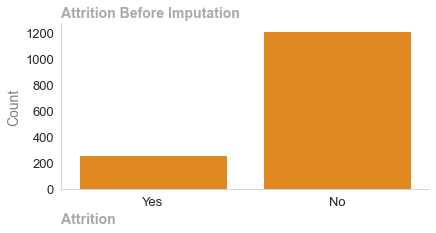

In [87]:

# Create a plot for Attrition plot
sns.catplot(x='Attrition', kind='count', data=df_new, height=3, aspect=2,color='darkorange') 
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Attrition',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Attrition Before Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)

In [88]:
# Use mode to impute categorical data
df_new["Attrition"].fillna(df_new["Attrition"].mode().iloc[0], inplace=True) # if data is skewed we use median

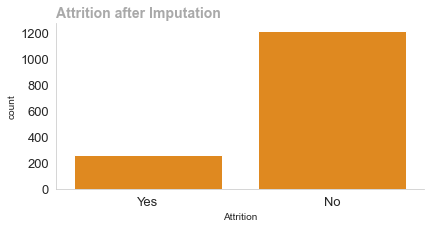

In [89]:
# Create catplot for feature
sns.catplot(x='Attrition', kind='count', data=df_new, height=3, aspect=2,color='darkorange') 
# Adding a title to the plot
plt.title('Attrition after Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

In [90]:
# Check that we have dealt with missing values
df_new.isnull().values.any()

False

In [91]:
# Check the head of the data
df_hyp=df_new.head()


In [92]:
df_hyp.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Yes,41.92,1.02,1.77,1.03,1.05,2.15,93.83,3.43,2.46,3.40,7.08,9.90,2.84,1.01,95.61,0.00,8.06,0.00,1.05,5.80,3.99,0.00,4.59,990.11,6438.95,20845.10
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,51.59,1.02,1.04,0.94,2.11,3.47,52.30,1.81,1.79,1.58,1.11,9.90,4.12,4.31,85.37,1.10,8.97,3.26,2.53,10.07,7.94,1.03,5.90,276.78,4457.66,24877.90
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,33.13,2.20,2.12,0.81,4.01,3.98,87.27,1.88,0.83,3.30,5.54,15.40,2.78,2.33,76.25,0.00,8.43,3.00,2.92,0.00,0.00,0.00,0.00,1204.16,2124.55,2262.94
3,No,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,Yes,34.71,2.94,3.67,0.82,4.59,3.73,56.38,2.93,1.10,3.22,0.77,9.76,2.77,3.03,75.89,0.00,7.66,2.86,3.12,8.44,5.56,2.85,0.00,1352.75,2771.70,27189.91
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,24.79,1.99,1.12,0.82,7.23,1.08,40.43,3.12,0.94,1.70,10.12,11.92,3.28,3.03,72.67,0.95,6.24,2.81,3.11,2.04,1.97,2.50,2.22,485.05,3254.60,17675.54


In [93]:
df_new.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Yes,41.92,1.02,1.77,1.03,1.05,2.15,93.83,3.43,2.46,3.40,7.08,9.90,2.84,1.01,95.61,0.00,8.06,0.00,1.05,5.80,3.99,0.00,4.59,990.11,6438.95,20845.10
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,51.59,1.02,1.04,0.94,2.11,3.47,52.30,1.81,1.79,1.58,1.11,9.90,4.12,4.31,85.37,1.10,8.97,3.26,2.53,10.07,7.94,1.03,5.90,276.78,4457.66,24877.90
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,33.13,2.20,2.12,0.81,4.01,3.98,87.27,1.88,0.83,3.30,5.54,15.40,2.78,2.33,76.25,0.00,8.43,3.00,2.92,0.00,0.00,0.00,0.00,1204.16,2124.55,2262.94
3,No,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,Yes,34.71,2.94,3.67,0.82,4.59,3.73,56.38,2.93,1.10,3.22,0.77,9.76,2.77,3.03,75.89,0.00,7.66,2.86,3.12,8.44,5.56,2.85,0.00,1352.75,2771.70,27189.91
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,24.79,1.99,1.12,0.82,7.23,1.08,40.43,3.12,0.94,1.70,10.12,11.92,3.28,3.03,72.67,0.95,6.24,2.81,3.11,2.04,1.97,2.50,2.22,485.05,3254.60,17675.54


In [94]:
# Unique values for the dataset
unique_values=df_new['Attrition'].unique()
print(unique_values)

['Yes' 'No']


In [95]:
def get_correct_label(y):
    """
    This function converts the class labels
    from 'no' and 'yes' to 0 and 1 respectively
    """
    return y.replace(['No','Yes'],[0,1])

print(df_new['Attrition'].unique())
df_new['Attrition'] = get_correct_label(df_new['Attrition'])
print(df_new['Attrition'].unique())

['Yes' 'No']
[1 0]


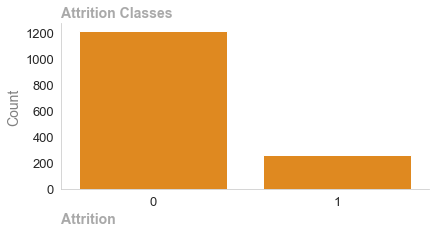

In [96]:
# Create a plot for Attrition plot
sns.catplot(x='Attrition', kind='count', data=df_new, height=3, aspect=2,color='darkorange') 
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Attrition',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Attrition Classes',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)

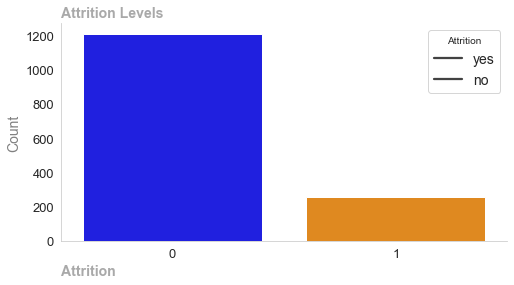

The number of peope who stayed is:  1212
The number of leavers  is:  258


In [97]:
plt.figure(figsize=(8,4))

colors=['blue','darkorange']
# Create a plot for Attrition plot
sns.barplot(x=df_new['Attrition'].value_counts().index,y=df_new['Attrition'].value_counts(),
           hue=df_new['Attrition'].value_counts().index, palette=colors, dodge=False)
plt.title('Attrition Levels', fontsize=14,fontweight='bold',color='darkgrey',loc='left')
# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Attrition',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.legend(title='Attrition', loc='upper right',fontsize=14, labels=['yes','no'])
plt.show()

print('The number of peope who stayed is: ',df_new['Attrition'].value_counts()[0])
print('The number of leavers  is: ',df_new['Attrition'].value_counts()[1])

In [98]:
# Select numerical columns
numerical_columns= df_new.select_dtypes(include=['float64','int32','int64']).columns
df_num=df_new[numerical_columns]
categorical_columns= df_new.select_dtypes(include=['object']).columns
df_cat= df_new[categorical_columns]

In [99]:
df_num.columns

Index(['Attrition', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DailyRate', 'MonthlyIncome', 'MonthlyRate'],
      dtype='object')

In [100]:
df_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

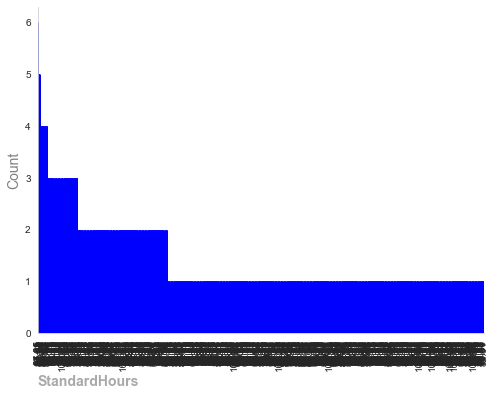

In [101]:
# Set figure for the plot
plt.figure(figsize=(8,6))

# Create catplot for feature
df_num['StandardHours'].value_counts().plot (kind='bar', color='lightcoral', edgecolor='blue')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('StandardHours',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()


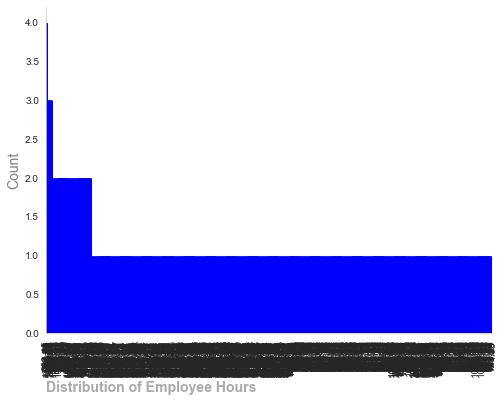

In [102]:
# Set figure for the plot
plt.figure(figsize=(8,6))

# Create catplot for feature
df_num['EmployeeNumber'].value_counts().plot (kind='bar', color='lightcoral', edgecolor='blue')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Distribution of Employee Hours',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()

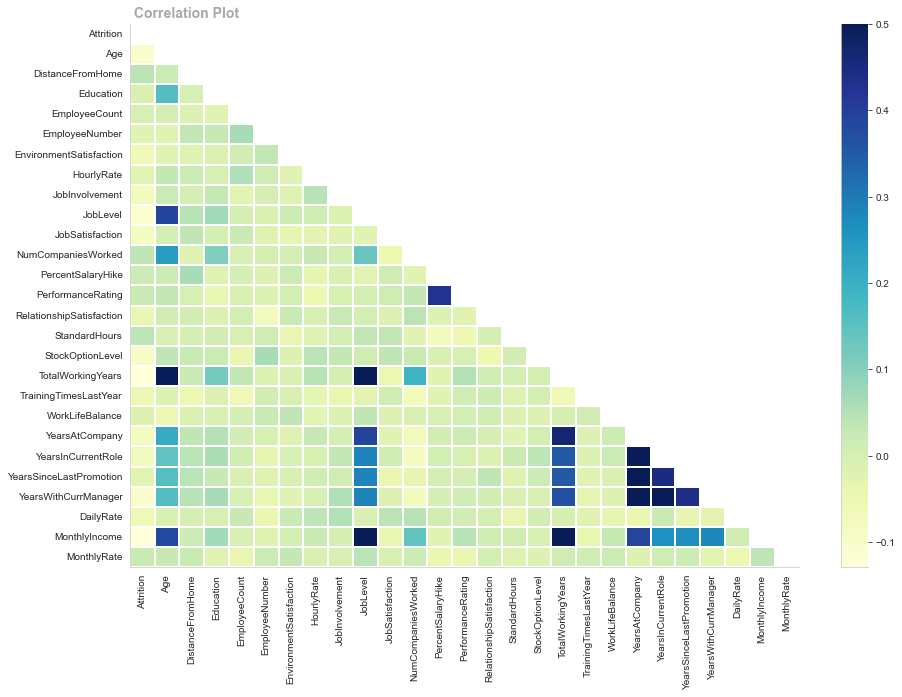

In [103]:
# Calculate correlations
corr = df_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

# Adding a title to the plot
plt.title(' Correlation Plot ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)


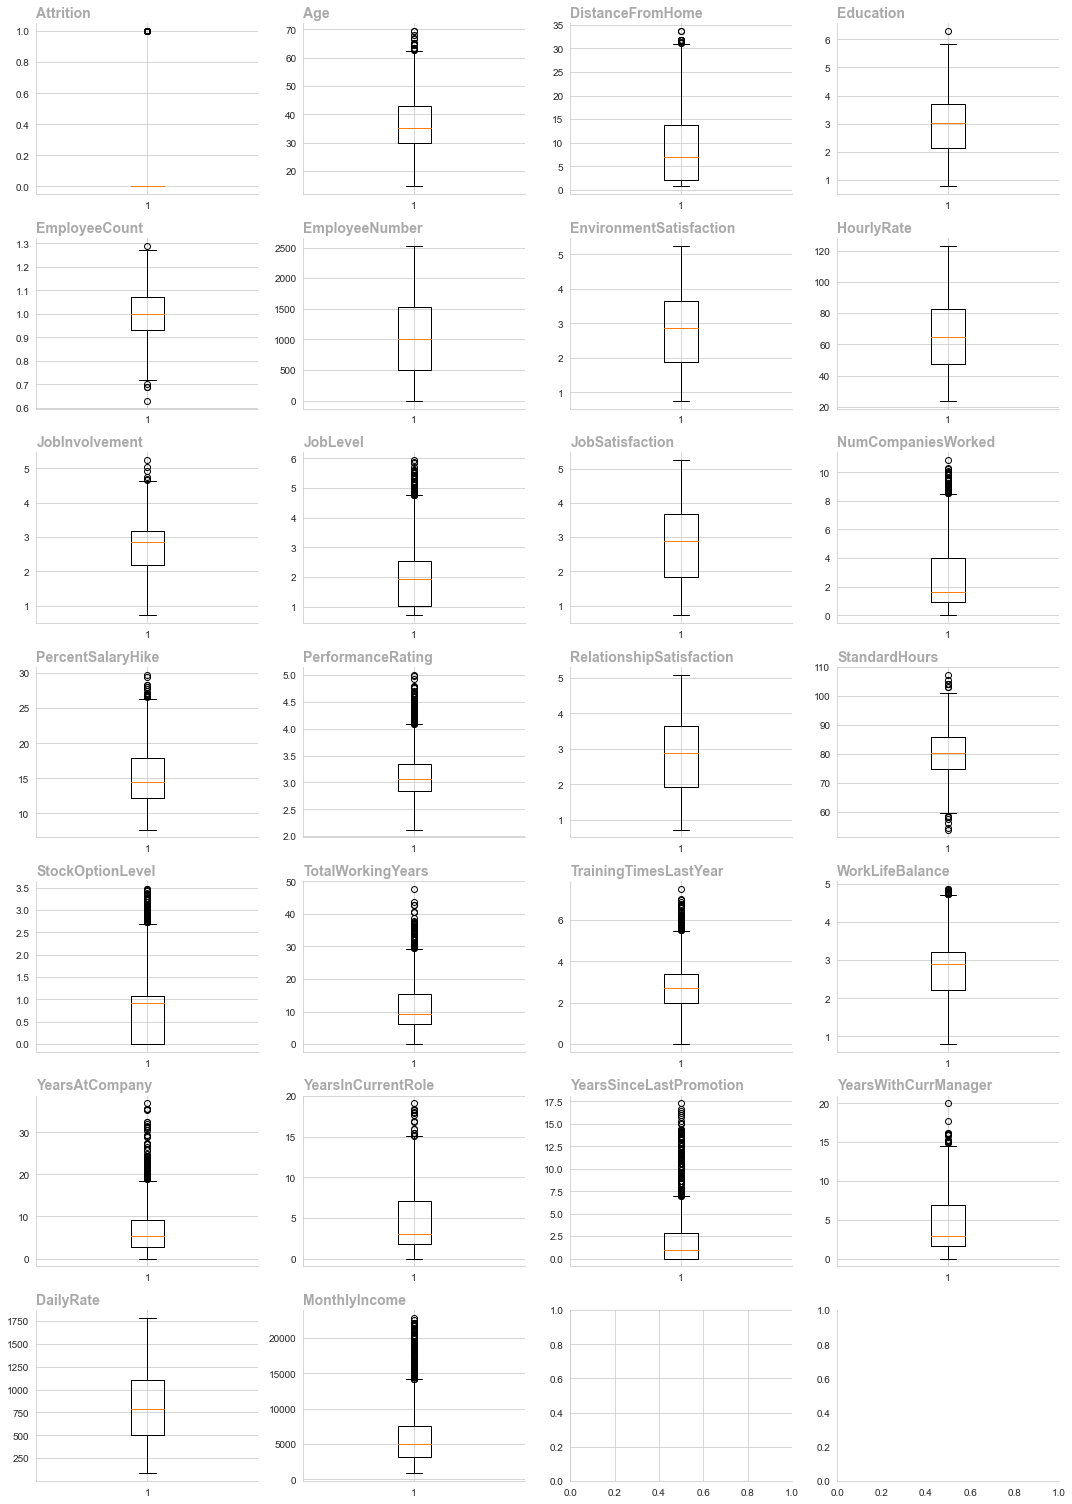

In [104]:
# Get the numbers of columns in the dataset
num_cols=len(df_num.columns)
# Calculate the numners of rows and columns for the subplot layout
rows= (num_cols - 1) // 4 +1
cols= min(num_cols, 4)
# Create Subplots
fig,axes= plt.subplots(rows,cols,figsize=(15, 3 * rows))
# Flattent the axrs
axes=axes.flatten()
# plot each columns in the subplot
for i, col in enumerate(list(df_num.columns)[:-1]):
    axes[i].boxplot(df_num[col], vert=True)
    axes[i].set_title(col,fontsize=14,fontweight='bold',color='darkgrey',loc='left')
# Adjust layout    
sns.despine()
plt.grid(False)    
plt.tight_layout()
plt.show()

In [105]:
# Summary of each numerical attribute
df_num.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
Attrition,1470.0,0.18,0.38,0.00,0.00,0.00,0.00,1.00
Age,1470.0,36.77,9.90,14.54,29.85,35.02,42.86,69.40
DistanceFromHome,1470.0,9.17,8.24,0.75,2.16,6.98,13.70,33.68
Education,1470.0,2.92,1.08,0.77,2.13,3.01,3.69,6.29
EmployeeCount,1470.0,1.00,0.10,0.63,0.93,1.00,1.07,1.29
EmployeeNumber,1470.0,1023.82,610.66,1.05,494.78,1014.53,1530.20,2530.92
EnvironmentSatisfaction,1470.0,2.72,1.13,0.76,1.89,2.88,3.65,5.25
HourlyRate,1470.0,65.46,21.33,23.86,47.56,64.93,82.77,123.20
JobInvolvement,1470.0,2.74,0.77,0.72,2.18,2.86,3.17,5.24
JobLevel,1470.0,2.05,1.12,0.72,1.04,1.93,2.53,5.94


In [106]:
# create fuvtion to idenidy outliers with an if else statement

def determine_outlier_thresholds_iqr(column):
    Q1 = column.quantile(.25)
    Q3 = column.quantile(.75)
    iqr = Q3 - Q1
    upper_limit = Q3 + 1.5 * iqr
    lower_limit = Q1 - 1.5 * iqr
    return lower_limit, upper_limit

def check_outliers_iqr(column):
    lower_limit, upper_limit = determine_outlier_thresholds_iqr(column)
    if column[(column > upper_limit) | (column < lower_limit)].any(axis=None):
        return True
    else: 
        return False

#  check for outliers 

def replace_with_thresholds_iqr(dataframe, cols, th1=0.05, th3=0.95, replace=False):

    data = []
    for col_name in cols:
        if col_name != 'Outcome':
            outliers_ = check_outliers_iqr(dataframe[col_name])
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe[col_name])
            if outliers_:
                count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
                if replace: 
                    if lower_limit < 0:
                        # We don't want to replace with negative values, right!
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_iqr(dataframe[col_name])
            data.append([outliers_, outliers_status, count, col_name, lower_limit, upper_limit ])
    table = tabulate(data, headers=['Outliers (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using IQR")
    print(table)

columns_to_process = ['Age', 'DistanceFromHome', 'JobInvolvement', 'JobLevel', 'NumCompaniesWorked',
                       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
                       'MonthlyIncome']
 
replace_with_thresholds_iqr(df_num, columns_to_process, replace=True)

## Anurag Dhadse,2021.Removing Outliers. Understanding How and What behind the Magic...Available at: https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff [Accesed] 22-12-2023]

Removing Outliers using IQR
=======================  ==========  =======  =======================  =============  =============
Outliers (Previously)    Outliers      Count  Column                     Lower Limit    Upper Limit
=======================  ==========  =======  =======================  =============  =============
True                     False            15  Age                            10.3288        62.3787
True                     False            10  DistanceFromHome              -15.1462        31.0037
True                     False             6  JobInvolvement                   0.695          4.655
True                     False            50  JobLevel                      -1.19125        4.75875
True                     False            45  NumCompaniesWorked               -3.58            8.5
True                     False            15  PercentSalaryHike               3.6625        26.4025
True                     False            58  TotalWorkingYears         

In [107]:
# Add an overall title
fig.suptitle("Boxplots of Numeric Columns", fontsize=16, fontweight='bold', color='navy')

Text(0.5, 0.98, 'Boxplots of Numeric Columns')

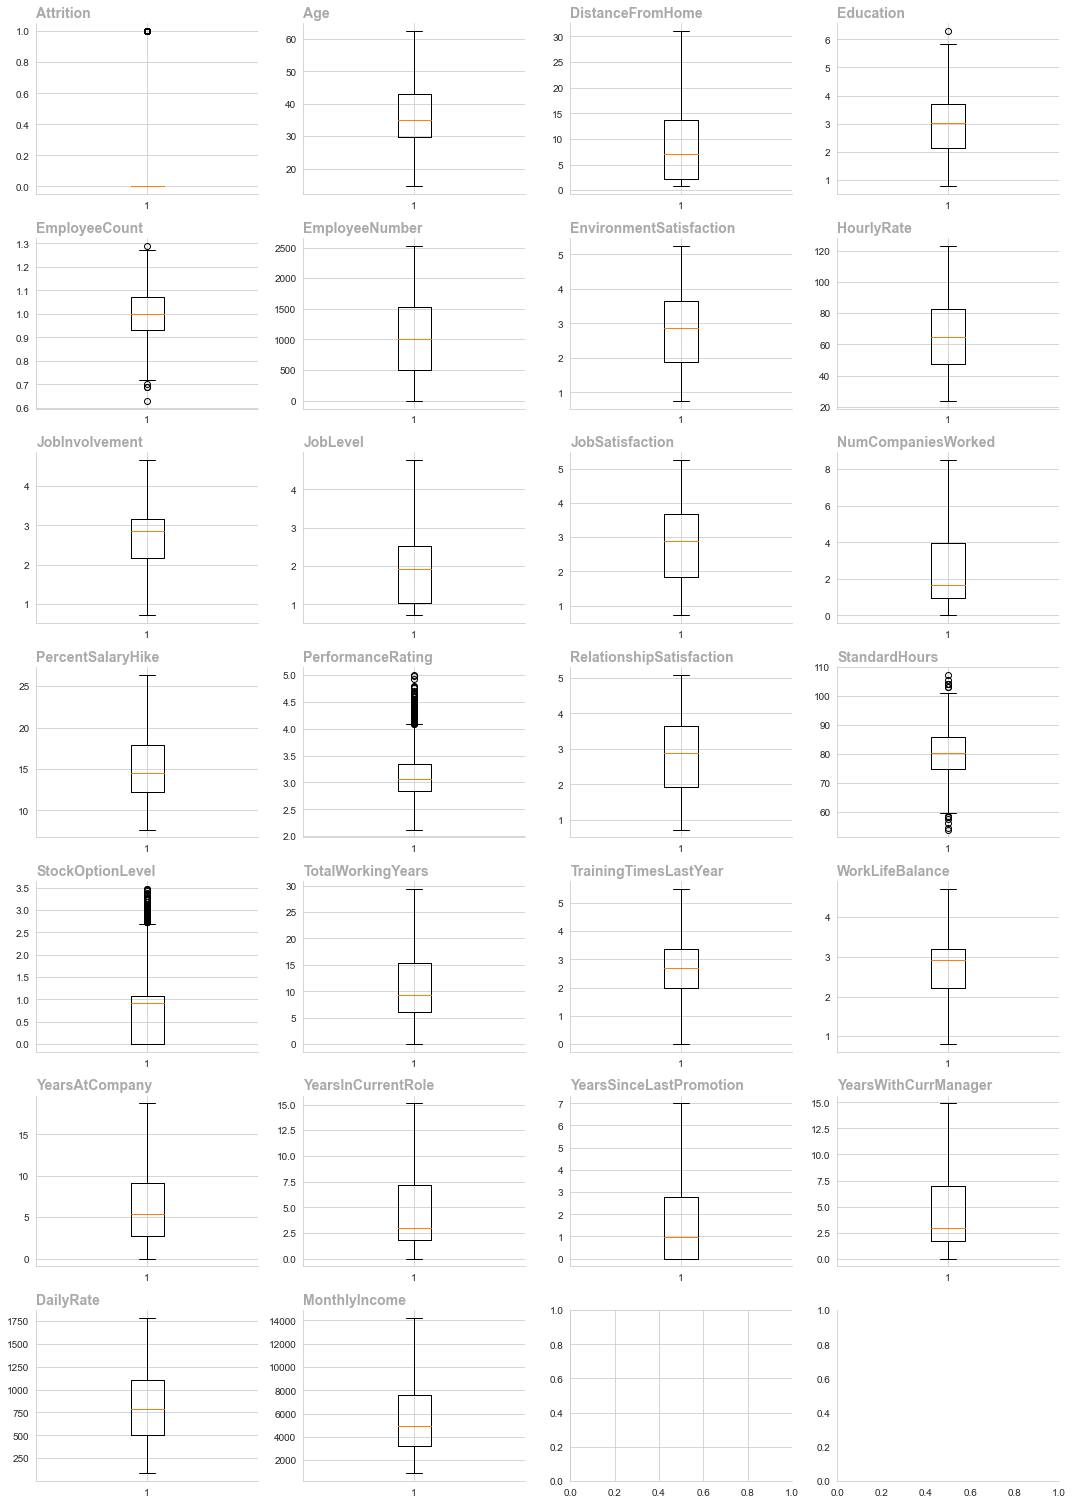

In [108]:
# Add an overall title
fig.suptitle("Boxplots of Numeric Columns", fontsize=16, fontweight='bold', color='navy')

# Get the numbers of columns in the dataset
num_cols=len(df_num.columns)
# Calculate the numners of rows and columns for the subplot layout
rows= (num_cols - 1) // 4 +1
cols= min(num_cols, 4)
# Create Subplots
fig,axes= plt.subplots(rows,cols,figsize=(15, 3 * rows))
# Flattent the axrs
axes=axes.flatten()
# plot each columns in the subplot
for i, col in enumerate(list(df_num.columns)[:-1]):
    axes[i].boxplot(df_num[col], vert=True)
    axes[i].set_title(col,fontsize=14,fontweight='bold',color='darkgrey',loc='left')
# Adjust layout    
sns.despine()
plt.grid(False)    
plt.tight_layout()



plt.show()

In [109]:
# group the dataframe by attrition
Attrition = df_num.groupby('Attrition')

# Calulate the mean fot each group
attrition_means=Attrition.mean()
# Rename the index to employed and ledt
attrition_means.index= ['Employed','Left']
# transpse the columns for readability
transpose_means=attrition_means.transpose()
#print the column
print(transpose_means)

                              Employed          Left
Age                          37.190027     34.609336
DistanceFromHome              9.004461      9.893881
Education                     2.924942      2.901589
EmployeeCount                 0.999010      0.997946
EmployeeNumber             1030.559051    992.177597
EnvironmentSatisfaction       2.749307      2.560969
HourlyRate                   65.729472     64.213450
JobInvolvement                2.765483      2.618081
JobLevel                      2.091541      1.761240
JobSatisfaction               2.754480      2.511047
NumCompaniesWorked            2.604728      2.840930
PercentSalaryHike            15.283715     15.475213
PerformanceRating             3.142657      3.174729
RelationshipSatisfaction      2.744992      2.624496
StandardHours                80.079068     80.885349
StockOptionLevel              0.841568      0.633798
TotalWorkingYears            11.730730      9.130775
TrainingTimesLastYear         2.823380      2.

In [110]:
df_age=df_num.copy()

In [111]:
# Identify age bins and labels
age_bins=[20,30,40,50,60]
age_labels=['20-29','30-39','40-49','50-59']
# Create new dataframe with age binned
df_age['Age_binned']= pd.cut(df_age['Age'], bins=age_bins, labels=age_labels, include_lowest=True)
# use crosstab to contigency table
contingency_table= pd.crosstab(df_age['Age_binned'],df_age['Attrition'], margins=True)
print(contingency_table)

Attrition      0    1   All
Age_binned                 
20-29        272   82   354
30-39        495  109   604
40-49        278   33   311
50-59        122   25   147
All         1167  249  1416


In [112]:
# Create prabalities tables
probabilities=contingency_table/contingency_table.loc['All']
print(probabilities)

Attrition          0         1       All
Age_binned                              
20-29       0.233076  0.329317  0.250000
30-39       0.424165  0.437751  0.426554
40-49       0.238218  0.132530  0.219633
50-59       0.104542  0.100402  0.103814
All         1.000000  1.000000  1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

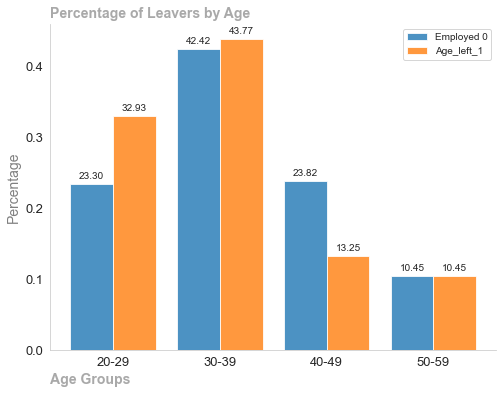

In [113]:
# Create custom colors for histogram
colors=['midnightblue','darkorange']
age_groups=['20-29','30-39','40-49','50-59']
age_employed_0 = [0.233,0.42416,0.2382,0.1045]
Age_left_1 =[0.3293,0.4377,0.1325,0.1045]
width=0.40
x= range(len(age_groups))
# Creat size for histogram
fig,ax = plt.subplots(figsize=(8,6))

# creatr barplotss
bar1= ax.bar(x,age_employed_0,width,label='Employed 0', alpha=0.8)
bar2= ax.bar([i + width for i in x],Age_left_1,width,label='Age_left_1', alpha=.8)

# set x and y labels
ax.set_xlabel('Age Groups',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
ax.set_ylabel('Percentage',fontsize=14,color= 'grey')
ax.set_title('Percentage of Leavers by Age',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
ax.set_xticks([i+ width/2 for i in x])
ax.set_xticklabels(age_groups)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend()
for i in x:
    ax.text(i,age_employed_0[i] + 0.01/2, f'{age_employed_0[i]*100:.2f}', ha='center',va='bottom')
    ax.text(i + width,Age_left_1[i] + 0.01/2, f'{Age_left_1[i]*100:.2f}', ha='center',va='bottom')   
sns.despine()
plt.grid(False)
plt.show

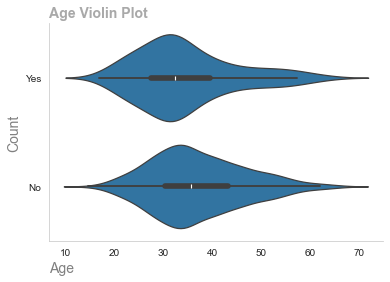

In [114]:
# Set the figure style
plt.figure(figsize=(6,4))

# Set the style for plot
sns.set_style('whitegrid')

# Create a Violin plot
sns.violinplot(y='Attrition', x='Age', data=df_HR)

# set the title
plt.title("Age Violin Plot",fontsize=14,fontweight='bold',color='darkgrey',loc='left')


#  set the x label and y label
plt.xlabel('Age',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

#  remove the spine and grid
sns.despine()
plt.grid(False)
plt.show()

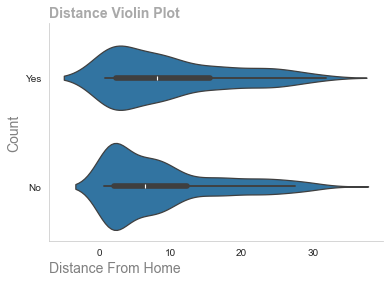

In [115]:
# Set the figure style
plt.figure(figsize=(6,4))

# Set the style for plot
sns.set_style('whitegrid')

# Create a Violin plot
sns.violinplot(y='Attrition', x='DistanceFromHome', data=df_HR)

# set the title
plt.title("Distance Violin Plot",fontsize=14,fontweight='bold',color='darkgrey',loc='left')

#  set the x label and y label
plt.xlabel('Distance From Home',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

#  remove the spine and grid
sns.despine()
plt.grid(False)
plt.show()

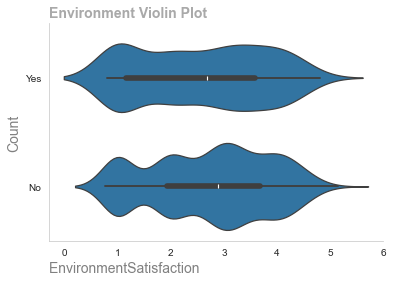

In [116]:
# Set the figure style
plt.figure(figsize=(6,4))

# Set the style for plot
sns.set_style('whitegrid')

# Create a Violin plot
sns.violinplot(y='Attrition', x='EnvironmentSatisfaction', data=df_HR)


# set the title
plt.title("Environment Violin Plot",fontsize=14,fontweight='bold',color='darkgrey',loc='left')
#  set the x label and y label
plt.xlabel('EnvironmentSatisfaction ',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

#  remove the spine and grid
sns.despine()
plt.grid(False)
plt.show()

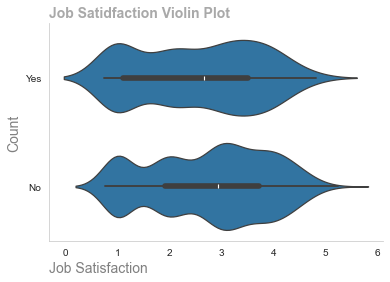

In [117]:
# Set the figure style
plt.figure(figsize=(6,4))

# Set the style for plot
sns.set_style('whitegrid')

# Create a Violin plot
sns.violinplot(y='Attrition', x='JobSatisfaction', data=df_HR)


# set the title
plt.title("Job Satidfaction Violin Plot",fontsize=14,fontweight='bold',color='darkgrey',loc='left')

#  set the x label and y label
plt.xlabel('Job Satisfaction ',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

#  remove the spine and grid
sns.despine()
plt.grid(False)
plt.show()

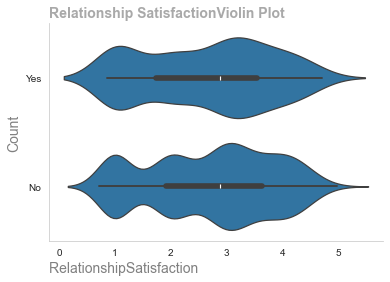

In [118]:
# Set the figure style
plt.figure(figsize=(6,4))

# Set the style for plot
sns.set_style('whitegrid')

# Create a Violin plot
sns.violinplot(y='Attrition', x='RelationshipSatisfaction', data=df_HR)


# set the title
plt.title("Relationship SatisfactionViolin Plot",fontsize=14,fontweight='bold',color='darkgrey',loc='left')

#  set the x label and y label
plt.xlabel('RelationshipSatisfaction ',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

#  remove the spine and grid
sns.despine()
plt.grid(False)
plt.show()

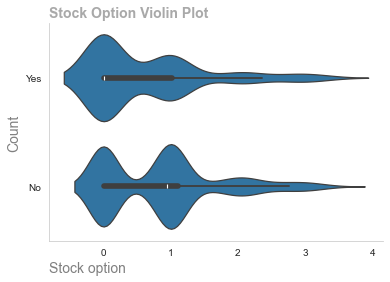

In [119]:
# Set the figure style
plt.figure(figsize=(6,4))

# Set the style for plot
sns.set_style('whitegrid')

# Create a Violin plot
sns.violinplot(y='Attrition', x='StockOptionLevel', data=df_HR)


# set the title
plt.title("Stock Option Violin Plot",fontsize=14,fontweight='bold',color='darkgrey',loc='left')

#  set the x label and y label
plt.xlabel('Stock option ',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

#  remove the spine and grid
sns.despine()
plt.grid(False)
plt.show()

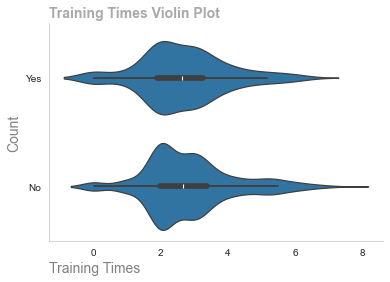

In [120]:
# Set the figure style
plt.figure(figsize=(6,4))

# Set the style for plot
sns.set_style('whitegrid')

# Create a Violin plot
sns.violinplot(y='Attrition', x='TrainingTimesLastYear', data=df_HR)


# set the title
plt.title("Training Times Violin Plot",fontsize=14,fontweight='bold',color='darkgrey',loc='left')

#  set the x label and y label
plt.xlabel('Training Times ',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

#  remove the spine and grid
sns.despine()
plt.grid(False)
plt.show()

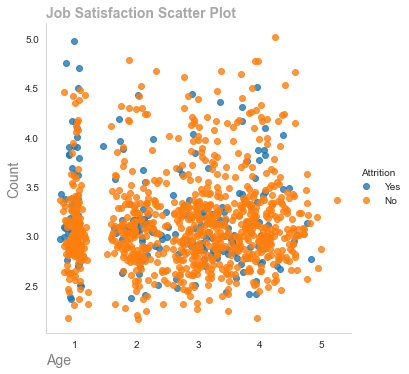

In [121]:
# create a scatter plot using implot
sns.lmplot(x='JobSatisfaction', y='PerformanceRating', data=df_HR, hue='Attrition', fit_reg=False)

# set the title
plt.title("Job Satisfaction Scatter Plot",fontsize=14,fontweight='bold',color='darkgrey',loc='left')

#  set the x label and y label
plt.xlabel('Age ',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

#  remove the spine and grid
sns.despine()
plt.grid(False)
plt.show()


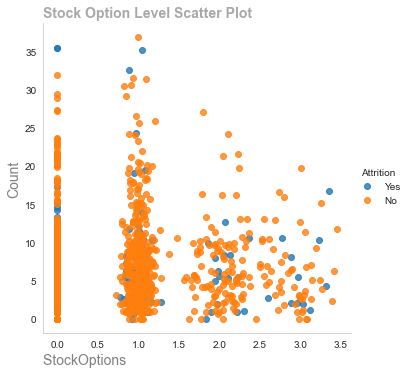

In [122]:
# create a scatter plot using implot
sns.lmplot(x='StockOptionLevel', y='YearsAtCompany', data=df_HR, hue='Attrition', fit_reg=False)

# set the title
plt.title("Stock Option Level Scatter Plot",fontsize=14,fontweight='bold',color='darkgrey',loc='left')

#  set the x label and y label
plt.xlabel('StockOptions ',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

#  remove the spine and grid
sns.despine()
plt.grid(False)
plt.show()


In [123]:
df_num.columns

Index(['Attrition', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DailyRate', 'MonthlyIncome', 'MonthlyRate'],
      dtype='object')

In [124]:
# drop columns as ther are redundant features as they contain the same values
df_num = df_num.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1)

In [125]:
df_num.head()

,Attrition,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate
0,1,41.92,1.02,1.77,2.15,93.83,3.43,2.46,3.40,7.08,9.90,2.84,1.01,0.00,8.06,0.00,1.05,5.80,3.99,0.00,4.59,990.11,6438.95,20845.10
1,0,51.59,1.02,1.04,3.47,52.30,1.81,1.79,1.58,1.11,9.90,4.12,4.31,1.10,8.97,3.26,2.53,10.07,7.94,1.03,5.90,276.78,4457.66,24877.90
2,1,33.13,2.20,2.12,3.98,87.27,1.88,0.83,3.30,5.54,15.40,2.78,2.33,0.00,8.43,3.00,2.92,0.00,0.00,0.00,0.00,1204.16,2124.55,2262.94
3,0,34.71,2.94,3.67,3.73,56.38,2.93,1.10,3.22,0.77,9.76,2.77,3.03,0.00,7.66,2.86,3.12,8.44,5.56,2.85,0.00,1352.75,2771.70,27189.91
4,0,24.79,1.99,1.12,1.08,40.43,3.12,0.94,1.70,8.50,11.92,3.28,3.03,0.95,6.24,2.81,3.11,2.04,1.97,2.50,2.22,485.05,3254.60,17675.54


In [126]:
df_num.columns

Index(['Attrition', 'Age', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'DailyRate', 'MonthlyIncome', 'MonthlyRate'],
      dtype='object')

In [127]:
#  Shape of the dataset
df_num.shape

(1470, 24)

In [128]:
#  df_num columns
df_num.columns

Index(['Attrition', 'Age', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'DailyRate', 'MonthlyIncome', 'MonthlyRate'],
      dtype='object')

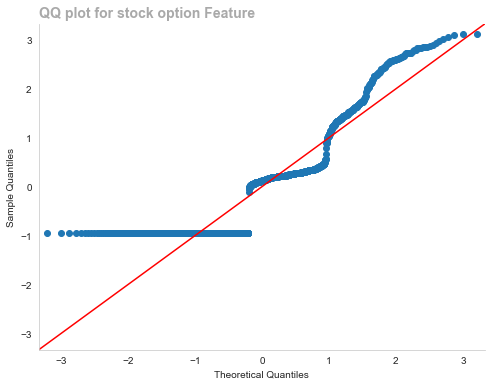

In [129]:
plt.rcParams['figure.figsize'] = [8, 6]
qqplot(df_num['StockOptionLevel'], norm, fit=True, line="45")
plt.title("QQ plot for stock option Feature",fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)
plt.show()

#Zach,2020.How to Perform a Box-Cox Transformation in Python..Available at: https://www.statology.org/box-cox-transformation-python/ [Accesed] 22-12-2023]

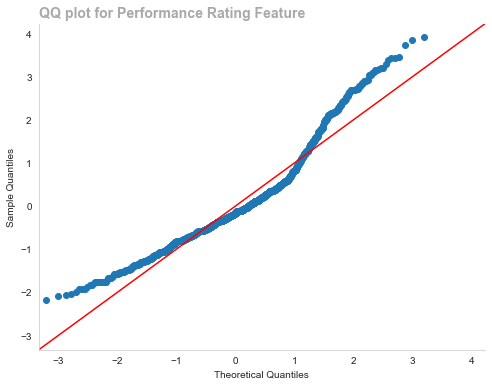

In [130]:
plt.rcParams['figure.figsize'] = [8, 6]
qqplot(df_num['PerformanceRating'], norm, fit=True, line="45")
plt.title("QQ plot for Performance Rating Feature",fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)
plt.show()

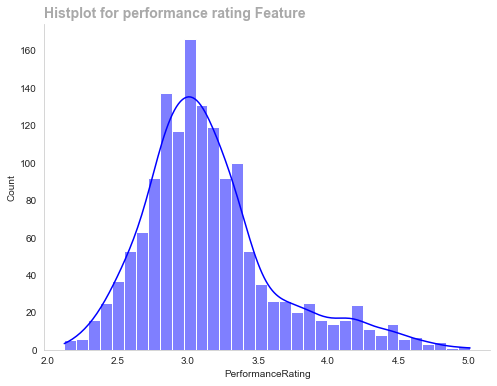

In [131]:
#plot the distribution of data values
sns.histplot(df_num['PerformanceRating'], kde=True, color='b') 
plt.title("Histplot for performance rating Feature",fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)
plt.show()

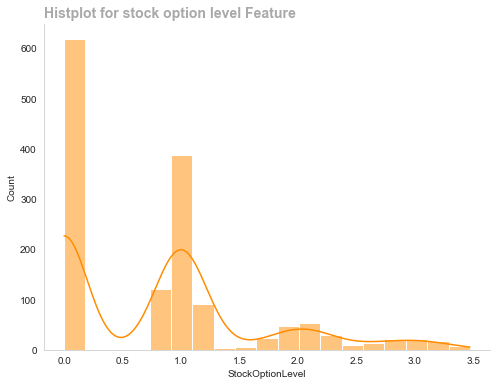

In [132]:
#plot the distribution of data values
sns.histplot(df_num['StockOptionLevel'], kde=True, color='darkorange') 
plt.title("Histplot for stock option level Feature",fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)
plt.show()

In [133]:
#  df_num columns
df_num.columns

Index(['Attrition', 'Age', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'DailyRate', 'MonthlyIncome', 'MonthlyRate'],
      dtype='object')

In [134]:
# list of columns to perform sharipo wilkes test for normality
columns=['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DailyRate', 'MonthlyIncome', 'MonthlyRate']
# Set the signifance level
alpha= 0.05

# perform sharipo wilko test for each column
for i in columns:
    print (i)
    a,b= stats.shapiro(df_num[i])
    
    # print the t test and the p value
    print ('Statistics', a, 'p-value', b)
    if b < alpha:
        print(' The null hypothesis can be rejected')
    else:
        print(' The null hypothesis can not be rejected')
        
#Saloni Mishra,2020.Methods for Normality Test with Application in Python...Available at: https://medium.com/towards-data-science/methods-for-normality-test-with-application-in-python-bb91b49ed0f5 [Accesed] 22-12-2023]

Age
Statistics 0.9738243222236633 p-value 1.0659497771424767e-15
 The null hypothesis can be rejected
DistanceFromHome
Statistics 0.861354649066925 p-value 3.875466203061883e-34
 The null hypothesis can be rejected
Education
Statistics 0.9777684211730957 p-value 2.681671074436509e-14
 The null hypothesis can be rejected
EnvironmentSatisfaction
Statistics 0.9537271857261658 p-value 3.766294288931367e-21
 The null hypothesis can be rejected
HourlyRate
Statistics 0.9750291109085083 p-value 2.749492663709982e-15
 The null hypothesis can be rejected
JobInvolvement
Statistics 0.9773744344711304 p-value 1.9108041768322627e-14
 The null hypothesis can be rejected
JobLevel
Statistics 0.8801637887954712 p-value 3.1827784959884076e-32
 The null hypothesis can be rejected
JobSatisfaction
Statistics 0.9470546841621399 p-value 1.4391459599920866e-22
 The null hypothesis can be rejected
NumCompaniesWorked
Statistics 0.853135347366333 p-value 6.547420308161748e-35
 The null hypothesis can be rejected


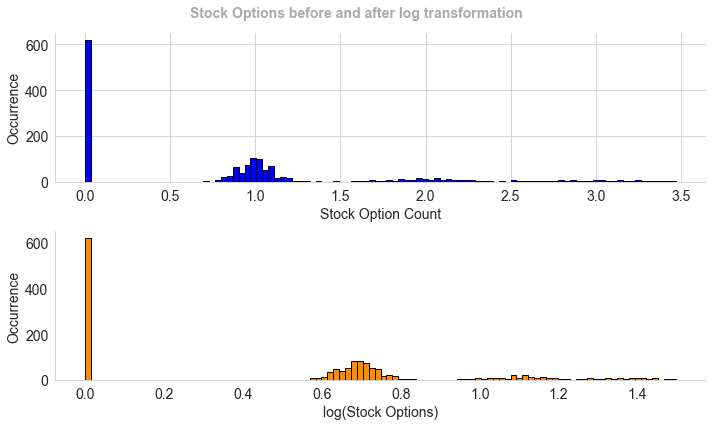

In [135]:
# adding a new column with log transformation
df_num['log_stockoption'] = np.log1p(df_num['StockOptionLevel'])

# create subplots
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,6)) 
df_num['StockOptionLevel'].hist(ax=ax1, bins=100,color='blue',edgecolor='black') 
ax1.tick_params(labelsize=14) 
ax1.set_xlabel('Stock Option Count', fontsize=14) 
ax1.set_ylabel('Occurrence', fontsize=14)
sns.despine()
plt.grid(False)

# plot the histogram of age in the subplot
df_num['log_stockoption'].hist(ax=ax2, bins=100,color='darkorange',edgecolor='black') 
ax2.tick_params(labelsize=14) 
ax2.set_xlabel('log(Stock Options)', fontsize=14) 
ax2.set_ylabel('Occurrence', fontsize=14)

# set the overall suptitle for the plots
plt.suptitle("Stock Options before and after log transformation",fontsize=14,fontweight='bold',color='darkgrey')
sns.despine()
plt.grid(False)
plt.tight_layout()
plt.show()

# adding a new column with log transformation
df_num['boxcox_stockoption'] = best_lambda=boxcox(df_num['StockOptionLevel'])

# create subplots
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,6)) 
df_num['boxcox_stockoption'].hist(ax=ax1, bins=100,color='blue',edgecolor='black') 
ax1.tick_params(labelsize=14) 
ax1.set_xlabel('Stock Option Count', fontsize=14) 
ax1.set_ylabel('Occurrence', fontsize=14)
sns.despine()
plt.grid(False)

# plot the histogram of age in the subplot
df_num['boccox_stockoption'].hist(ax=ax2, bins=100,color='darkorange',edgecolor='black') 
ax2.tick_params(labelsize=14) 
ax2.set_xlabel('box cox(Stock Options)', fontsize=14) 
ax2.set_ylabel('Occurrence', fontsize=14)

# set the overall suptitle for the plots
plt.suptitle("Stock Options before and after log transformation",fontsize=14,fontweight='bold',color='darkgrey')
sns.despine()
plt.grid(False)
plt.tight_layout()
plt.show()

 Zach,2020.How to Perform a Box-Cox Transformation in Python..Available at: https://www.statology.org/box-cox-transformation-python/ [Accesed] 22-12-2023]

In [136]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1470 non-null   int64  
 1   Age                       1470 non-null   float64
 2   DistanceFromHome          1470 non-null   float64
 3   Education                 1470 non-null   float64
 4   EnvironmentSatisfaction   1470 non-null   float64
 5   HourlyRate                1470 non-null   float64
 6   JobInvolvement            1470 non-null   float64
 7   JobLevel                  1470 non-null   float64
 8   JobSatisfaction           1470 non-null   float64
 9   NumCompaniesWorked        1470 non-null   float64
 10  PercentSalaryHike         1470 non-null   float64
 11  PerformanceRating         1470 non-null   float64
 12  RelationshipSatisfaction  1470 non-null   float64
 13  StockOptionLevel          1470 non-null   float64
 14  TotalWor

In [137]:
# use log transformation to transform the datafraame to a normalise distribtion
df_log_transformed= np.log10(df_num)

C:\Users\andrew\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning:

divide by zero encountered in log10



In [138]:
# list of columns to perform sharipo wilkes test for normality
columns=['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DailyRate', 'MonthlyIncome', 'MonthlyRate']

# Set the signifance level
alpha= 0.05
# perform sharipo wilko test for each column
for i in columns:
    print (i)
    a,b= stats.shapiro(df_log_transformed[i])
    
     # print the t test and the p value
    print ('Statistics', a, 'p-value', b)
    if b < alpha:
        print(' The null hypothesis can be rejected')
    else:
        print(' The null hypothesis can not be rejected')
        
 #Saloni Mishra,2020.Methods for Normality Test with Application in Python...Available at: https://medium.com/towards-data-science/methods-for-normality-test-with-application-in-python-bb91b49ed0f5 [Accesed] 22-12-2023] Saloni Mishra,2020.Methods for Normality Test with Application in Python...Available at: https://medium.com/towards-data-science/methods-for-normality-test-with-application-in-python-bb91b49ed0f5 [Accesed] 22-12-2023]Saloni Mishra,2020.Methods for Normality Test with Application in Python...Available at: https://medium.com/towards-data-science/methods-for-normality-test-with-application-in-python-bb91b49ed0f5 [Accesed] 22-12-2023]

Age
Statistics 0.9939602613449097 p-value 1.0884558832913171e-05
 The null hypothesis can be rejected
DistanceFromHome
Statistics 0.9460957646369934 p-value 9.235465354485057e-23
 The null hypothesis can be rejected
Education
Statistics 0.8971573114395142 p-value 2.8097264064880014e-30
 The null hypothesis can be rejected
EnvironmentSatisfaction
Statistics 0.8940067887306213 p-value 1.1742565082510976e-30
 The null hypothesis can be rejected
HourlyRate
Statistics 0.9639227986335754 p-value 1.1638830333266656e-18
 The null hypothesis can be rejected
JobInvolvement
Statistics 0.8941251039505005 p-value 1.2129342220541696e-30
 The null hypothesis can be rejected
JobLevel
Statistics 0.9321538805961609 p-value 2.624317871502647e-25
 The null hypothesis can be rejected
JobSatisfaction
Statistics 0.8884010314941406 p-value 2.611498233190758e-31
 The null hypothesis can be rejected
NumCompaniesWorked
Statistics nan p-value 1.0
 The null hypothesis can not be rejected
PercentSalaryHike
Statisti

In [139]:
from scipy.stats import boxcox

In [140]:
df_num.head()

,Attrition,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate,log_stockoption
0,1,41.92,1.02,1.77,2.15,93.83,3.43,2.46,3.40,7.08,9.90,2.84,1.01,0.00,8.06,0.00,1.05,5.80,3.99,0.00,4.59,990.11,6438.95,20845.10,0.000000
1,0,51.59,1.02,1.04,3.47,52.30,1.81,1.79,1.58,1.11,9.90,4.12,4.31,1.10,8.97,3.26,2.53,10.07,7.94,1.03,5.90,276.78,4457.66,24877.90,0.741937
2,1,33.13,2.20,2.12,3.98,87.27,1.88,0.83,3.30,5.54,15.40,2.78,2.33,0.00,8.43,3.00,2.92,0.00,0.00,0.00,0.00,1204.16,2124.55,2262.94,0.000000
3,0,34.71,2.94,3.67,3.73,56.38,2.93,1.10,3.22,0.77,9.76,2.77,3.03,0.00,7.66,2.86,3.12,8.44,5.56,2.85,0.00,1352.75,2771.70,27189.91,0.000000
4,0,24.79,1.99,1.12,1.08,40.43,3.12,0.94,1.70,8.50,11.92,3.28,3.03,0.95,6.24,2.81,3.11,2.04,1.97,2.50,2.22,485.05,3254.60,17675.54,0.667829


In [141]:
le = LabelEncoder()
y = le.fit_transform(df_num['Attrition'])

In [142]:
#  split the dataset into x & Y
X=df_num.drop('Attrition', axis=1)
y=df_num['Attrition']

In [143]:
# Check the shape of the data
X.shape, y.shape

((1470, 24), (1470,))

In [144]:
# check the firt 5 columns of the dataset
X.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate,log_stockoption
0,41.92,1.02,1.77,2.15,93.83,3.43,2.46,3.40,7.08,9.90,2.84,1.01,0.00,8.06,0.00,1.05,5.80,3.99,0.00,4.59,990.11,6438.95,20845.10,0.000000
1,51.59,1.02,1.04,3.47,52.30,1.81,1.79,1.58,1.11,9.90,4.12,4.31,1.10,8.97,3.26,2.53,10.07,7.94,1.03,5.90,276.78,4457.66,24877.90,0.741937
2,33.13,2.20,2.12,3.98,87.27,1.88,0.83,3.30,5.54,15.40,2.78,2.33,0.00,8.43,3.00,2.92,0.00,0.00,0.00,0.00,1204.16,2124.55,2262.94,0.000000
3,34.71,2.94,3.67,3.73,56.38,2.93,1.10,3.22,0.77,9.76,2.77,3.03,0.00,7.66,2.86,3.12,8.44,5.56,2.85,0.00,1352.75,2771.70,27189.91,0.000000
4,24.79,1.99,1.12,1.08,40.43,3.12,0.94,1.70,8.50,11.92,3.28,3.03,0.95,6.24,2.81,3.11,2.04,1.97,2.50,2.22,485.05,3254.60,17675.54,0.667829


In [145]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [146]:
# create the instance c with n_components of 1
lda = LinearDiscriminantAnalysis(n_components=1)

# fit the lineardiscriminant model anf transpose the dats
X_lda = lda.fit_transform(X, y)

In [147]:
X_lda

array([[ 0.93514205],
       [-0.23266952],
       [ 0.52734866],
       ...,
       [-0.02723767],
       [-0.04878291],
       [ 0.34300153]])

In [148]:
lda.explained_variance_ratio_

array([1.])

In [149]:
# use smote to rebalance the attrition class as it ie essential when applying lda to avoid overfitting
smote=SMOTE(random_state=42)
X_resampled, y_resampled= smote.fit_resample(X,y)

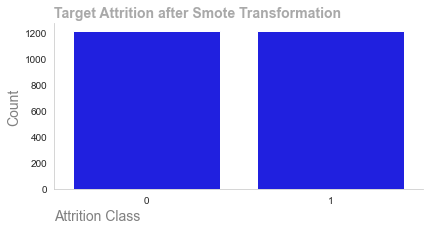

In [150]:
df_resampled=pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Attrition'] = y_resampled

sns.catplot(x='Attrition', kind='count', data=df_resampled, height=3, aspect=2,color='blue')
plt.title("Target Attrition after Smote Transformation",fontsize=14,fontweight='bold',color='darkgrey',loc='left')
#  set the x label and y label
plt.xlabel('Attrition Class ',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')


sns.despine()
plt.grid(False)
plt.show()

In [151]:
# Create a DataFrame from the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Attrition'] = y_resampled

# Print the class distribution
print("Class Distribution after SMOTE:")
print(df_resampled['Attrition'].value_counts())

Class Distribution after SMOTE:
Attrition
1    1212
0    1212
Name: count, dtype: int64


In [152]:
#  check the resampled  dataset
X_resampled.shape, y_resampled.shape

((2424, 24), (2424,))

In [153]:
# fit the model
X_lda = lda.fit(X_resampled, y_resampled)


In [154]:
X_lda

LinearDiscriminantAnalysis(n_components=1)

In [155]:
X_lda.explained_variance_ratio_

array([1.])

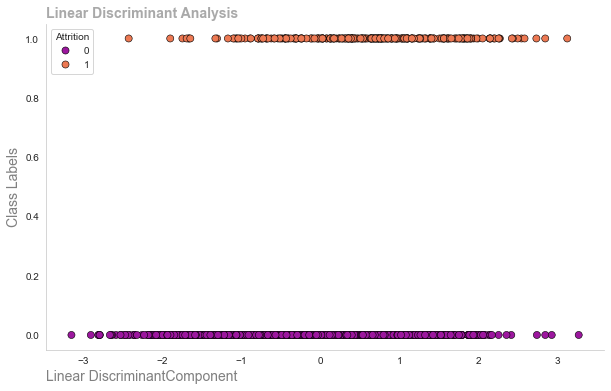

In [156]:
# visualise the model
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

df_lda=pd.DataFrame(X_lda, columns=['LinearDiscriminantComponent'])
df_lda['Attrition'] = y



plt.figure(figsize=(10,6))
sns.scatterplot(x='LinearDiscriminantComponent', y='Attrition', data=df_lda, hue='Attrition', palette='plasma', edgecolor='k', s=50)
plt.title("Linear Discriminant Analysis",fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Linear DiscriminantComponent ',fontsize=14,color='grey',loc='left')
plt.ylabel('Class Labels',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()


In [157]:
# split the date for decisiontreeclassifier
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=.20,random_state=1)

Accuracy : 0.69
Classification Report on 80% split :
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       234
           1       0.26      0.28      0.27        60

    accuracy                           0.69       294
   macro avg       0.53      0.54      0.54       294
weighted avg       0.70      0.69      0.69       294

Precision on Decision Tree model after LDA is applied:  0.26
Recall on decision tree after LDA is applied: 0.28
 Recall after LDA is applied: 0.27


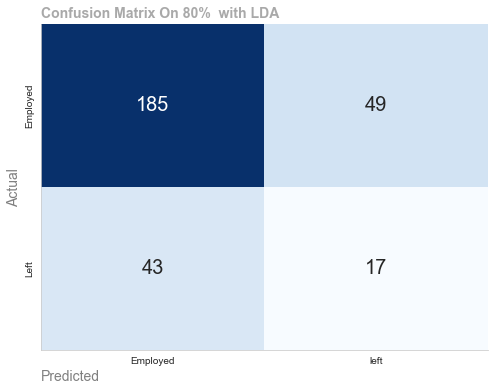

In [158]:
# create a decisiontreeclassifier
dt = DecisionTreeClassifier()

# fit the model on the training data
dt.fit(X_train, y_train)

# predict on the test data
y_pred = dt.predict(X_test)

# compute the confusion marix
confusion_matrix(y_test, y_pred)

# calulate accurracy
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy : {accuracy:.2f}')

# print classification model
print ('Classification Report on 80% split :')
print(classification_report(y_test, y_pred))

# calulate precision 7 recall scores
precision= precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print(f'Precision on Decision Tree model after LDA is applied: {precision: .2f}')
print(f'Recall on decision tree after LDA is applied: {recall:.2f}')

f1_value=f1_score(y_test,y_pred)
print(f' Recall after LDA is applied: {f1_value:.2f}')

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Employed', 'left'], yticklabels=['Employed', 'Left'],annot_kws={'size':20})

# set the plot properties
plt.title('Confusion Matrix On 80%  with LDA',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()

In [159]:
scaler=MinMaxScaler()
X_scaled= scaler.fit_transform(X)


# fit the pca moddel for comparison with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled, y)

In [160]:
X_pca

array([[-0.10663066, -0.34831654],
       [ 0.07253302,  0.12267523],
       [-0.73365678, -0.34675335],
       ...,
       [-0.26634306,  0.20485331],
       [-0.1180176 , -0.44013635],
       [-0.24992152, -0.35189803]])

In [161]:
# print the explaind ratio
pca.explained_variance_ratio_

array([0.19207504, 0.10414073])

In [162]:
# split the date for principal component analysis
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_lda, y, test_size=.20,random_state=1)

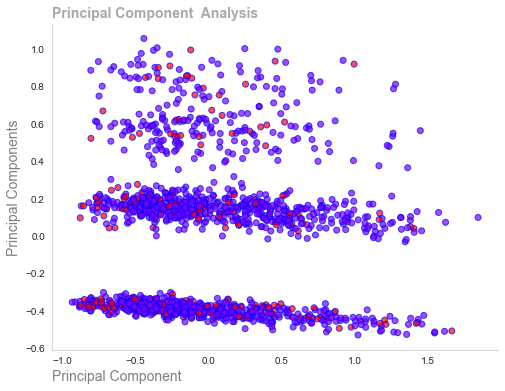

In [163]:
# set the label & plot for the scatter plot for the princpial components
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(X_pca[:,0],X_pca[:,1], c=y,cmap='rainbow',alpha=0.7,edgecolors='b')

# set the labels and title for the plot
plt.title("Principal Component  Analysis",fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Principal Component ',fontsize=14,color='grey',loc='left')
plt.ylabel('Principal Components',fontsize=14,color= 'grey')

# remove grides & spines for the plot
sns.despine()
plt.grid(False)
plt.show()

In [164]:
# use concat function to add cleaned data back to one dataframe
df_machine= pd.concat([df_cat,df_new], axis=1)

In [165]:
df_new.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate
0,1,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Yes,41.92,1.02,1.77,1.03,1.05,2.15,93.83,3.43,2.46,3.40,7.08,9.90,2.84,1.01,95.61,0.00,8.06,0.00,1.05,5.80,3.99,0.00,4.59,990.11,6438.95,20845.10
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,51.59,1.02,1.04,0.94,2.11,3.47,52.30,1.81,1.79,1.58,1.11,9.90,4.12,4.31,85.37,1.10,8.97,3.26,2.53,10.07,7.94,1.03,5.90,276.78,4457.66,24877.90
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,33.13,2.20,2.12,0.81,4.01,3.98,87.27,1.88,0.83,3.30,5.54,15.40,2.78,2.33,76.25,0.00,8.43,3.00,2.92,0.00,0.00,0.00,0.00,1204.16,2124.55,2262.94
3,0,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,Yes,34.71,2.94,3.67,0.82,4.59,3.73,56.38,2.93,1.10,3.22,0.77,9.76,2.77,3.03,75.89,0.00,7.66,2.86,3.12,8.44,5.56,2.85,0.00,1352.75,2771.70,27189.91
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,24.79,1.99,1.12,0.82,7.23,1.08,40.43,3.12,0.94,1.70,10.12,11.92,3.28,3.03,72.67,0.95,6.24,2.81,3.11,2.04,1.97,2.50,2.22,485.05,3254.60,17675.54


In [166]:
df_new.isnull().sum() 

Attrition                   0
BusinessTravel              0
Department                  0
EducationField              0
Gender                      0
JobRole                     0
MaritalStatus               0
OverTime                    0
Age                         0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
DailyRate                   0
MonthlyIncome               0
MonthlyRat

In [167]:
# drop columns as ther are redundant features as they contain the same values
df_new = df_new.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1)

In [168]:
df_new.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime', 'Age', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DailyRate',
       'MonthlyIncome', 'MonthlyRate'],
      dtype='object')

In [169]:
df_new.dtypes

Attrition                     int64
BusinessTravel               object
Department                   object
EducationField               object
Gender                       object
JobRole                      object
MaritalStatus                object
OverTime                     object
Age                         float64
DistanceFromHome            float64
Education                   float64
EnvironmentSatisfaction     float64
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobSatisfaction             float64
NumCompaniesWorked          float64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     float64
YearsWithCurrManager        

In [170]:
# Check columns for unique values to dind best encoding method
cat_cols= ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime',]
# use a for loop to get values
for column in cat_cols:
    unique_values= df_new[column].unique()
    print(f"Unique values for '{column}': {unique_values}")

Unique values for 'BusinessTravel': ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values for 'Department': ['Sales' 'Research & Development' 'Human Resources']
Unique values for 'EducationField': ['Life Sciences' 'Other' 'Medical' 'Technical Degree' 'Marketing'
 'Human Resources']
Unique values for 'Gender': ['Male' 'Female' 'No Gender']
Unique values for 'JobRole': ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Healthcare Representative' 'Manufacturing Director' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Unique values for 'MaritalStatus': ['Single' 'Married' 'Divorced']
Unique values for 'OverTime': ['Yes' 'No']


In [171]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()


In [172]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_new.columns[1:]:
    if df_new[col].dtype == 'object':
        if len(list(df_new[col].unique())) <= 2:
            le.fit(df_new[col])
            df_new[col] = le.transform(df_new[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

1 columns were label encoded.


In [173]:
# convert rest of categorical variable into dummy
df_new = pd.get_dummies(df_new, dtype=int, drop_first=True)

In [174]:
df_new.head(1)

,Attrition,OverTime,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,Gender_No Gender,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,1,41.92,1.02,1.77,2.15,93.83,3.43,2.46,3.4,7.08,9.9,2.84,1.01,0.0,8.06,0.0,1.05,5.8,3.99,0.0,4.59,990.11,6438.95,20845.1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1


In [175]:
df_new.shape

(1470, 46)

In [176]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

df_scaled=df_new.copy()

cols_to_scale=df_scaled.columns[df_scaled.columns !=  ' Attrition']

scaler = MinMaxScaler(feature_range=(0, 1))

for col in cols_to_scale:
    df_scaled[col] = df_scaled[col].astype(float)
    df_scaled[[col]] = scaler.fit_transform(df_scaled[[col]])
    
df_scaled['Attrition'] = pd.to_numeric(df_scaled['Attrition'], downcast='float'
                                      )
df_scaled=df_scaled.round(2)

df_scaled.head()



#  Hamza b,2018.Building an Employee Churn Model in Python to Develop a Strategic Retention Plan..Available at: https://medium.com/towards-data-science/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d [Accesed] 14-12-2023]

,Attrition,OverTime,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,Gender_No Gender,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1.0,1.0,0.50,0.01,0.18,0.31,0.70,0.60,0.33,0.59,0.65,0.10,0.25,0.07,0.00,0.17,0.00,0.06,0.16,0.21,0.00,0.23,0.53,0.25,0.62,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.68,0.01,0.05,0.60,0.29,0.24,0.20,0.19,0.10,0.10,0.69,0.82,0.32,0.19,0.43,0.43,0.27,0.42,0.06,0.30,0.11,0.16,0.75,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.34,0.04,0.24,0.72,0.64,0.26,0.02,0.57,0.51,0.35,0.23,0.37,0.00,0.18,0.40,0.52,0.00,0.00,0.00,0.00,0.66,0.06,0.02,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.37,0.07,0.53,0.66,0.33,0.49,0.07,0.55,0.07,0.09,0.22,0.53,0.00,0.16,0.38,0.57,0.23,0.29,0.17,0.00,0.75,0.09,0.82,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.19,0.04,0.06,0.07,0.17,0.53,0.04,0.22,0.93,0.19,0.40,0.53,0.27,0.13,0.37,0.57,0.06,0.10,0.14,0.11,0.23,0.11,0.52,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [177]:
df_scaled.shape

(1470, 46)

In [178]:
# Spliting the dataset into independent and dependent variables

# Independent variables
X = df_scaled.drop(columns=['Attrition'])

# Dependent variables
y = df_scaled['Attrition']

Gender

In [179]:
# Split the dataset (X, y) into training and testing
X_train20, X_test20, y_train20, y_test20 = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

                                            
print("Number transactions X_train dataset: ", X_train20.shape)
print("Number transactions y_train dataset: ", y_train20.shape)
print("Number transactions X_test dataset: ", X_test20.shape)
print("Number transactions y_test dataset: ", y_test20.shape)

Number transactions X_train dataset:  (1176, 45)
Number transactions y_train dataset:  (1176,)
Number transactions X_test dataset:  (294, 45)
Number transactions y_test dataset:  (294,)


In [180]:
# we have run a dummy classifier as a baseline to compare our models
dummy_classifier=DummyClassifier(strategy='stratified')
dummy_classifier.fit(X_train20,y_train20)

y_pred=dummy_classifier.predict(X_test20)

accuracy=accuracy_score(y_test20,y_pred)
print(f'Accuracy Dummy Classifier: {accuracy:.2f}')

print ('Classification Report Dummy classifier:')
print(classification_report(y_test20, y_pred))

precision_micro = precision_score(y_test20, y_pred, average='micro')
recall_micro = recall_score(y_test20, y_pred, average='micro')

Accuracy Dummy Classifier: 0.69
Classification Report Dummy classifier:
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       242
         1.0       0.16      0.17      0.16        52

    accuracy                           0.69       294
   macro avg       0.49      0.49      0.49       294
weighted avg       0.70      0.69      0.69       294



In [181]:
def train_and_evaluate_classifier(clf, X_train20, y_train20, X_test20, y_test20):
    # starting to track the time so that we can report the total training time
    start_time = time.time()
    
    # train the classifier
    clf.fit(X_train, y_train)
    
    # stop tracking time, now that training is completed
    end_time = time.time()
    
    # calculated how long training took
    elapsed_time = end_time - start_time
    
    # make predictions using the trained model. this will be used for evaluation of the trained model
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, 'predict_proba') else None
    
    # here are the metrics we use for evaluations
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba) if y_proba is not None else None,
        'AUC-PR': average_precision_score(y_test, y_proba) if y_proba is not None else None,
        'Training Time (s)': elapsed_time
    }
    
    return metrics

#Farzad Mahmoodinobar,2023.XGBoost: Intro, Step-by-Step Implementation, and Performance Comparison...Available at: https://medium.com/towards-data-science/xgboost-intro-step-by-step-implementation-and-performance-comparison-6018dfa21 [Accesed] 22-12-2023]

In [182]:
import time

In [183]:
def main():
    # initialize a dataframe to store the results in
    results_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'AUC-PR', 'Training Time (s)'])
    
 
    
    # split the data into train and test sets
    X_train20, X_test20, y_train20, y_test20 = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # initialize the classifiers
    classifiers = {
        'XGBoostn 20% split': xgb.XGBClassifier(),
        'Random Forest 20% split': RandomForestClassifier(),
        'SVM 20% split': SVC(probability=True),
        'k-NN 20% split': KNeighborsClassifier(),
        'Gradient Boosting Classifier 20% split' : GradientBoostingClassifier(),
        'Descision Trees 20% split': DecisionTreeClassifier(),
        'Logistic Regression 20% split' : LogisticRegression(),
        'Naive Bayes 20% split' : GaussianNB(),
        'LDA 20% split' : LinearDiscriminantAnalysis(),
        'AdaBoost 20% split': AdaBoostClassifier(),
        'CatBoost 20% split': CatBoostClassifier(verbose=0),
    }
    
    # train and evaluate the trained classifiers
    for name, clf in classifiers.items():
        metrics = train_and_evaluate_classifier(clf, X_train, y_train, X_test, y_test)
        results_df.loc[name] = metrics
    
    # sort classifiers alphabetically
    results_df.sort_index(inplace=True)
    
    # add row numbers
    results_df.reset_index(drop=False, inplace=True)
    results_df.index.name = '#'
    
    return results_df

if __name__ == "__main__":
    df = main()
##Farzad Mahmoodinobar,2023.XGBoost: Intro, Step-by-Step Implementation, and Performance Comparison...Available at: https://medium.com/towards-data-science/xgboost-intro-step-by-step-implementation-and-performance-comparison-6018dfa21 [Accesed] 22-12-2023]

In [184]:
# round results to 3 decimal places
df.round(3)

,index,Accuracy,Precision,Recall,F1-Score,AUC-ROC,AUC-PR,Training Time (s)
#,,,,,,,,
0,AdaBoost 20% split,0.799,0.526,0.167,0.253,0.690,0.372,0.189
1,CatBoost 20% split,0.799,0.524,0.183,0.272,0.701,0.395,3.795
2,Descision Trees 20% split,0.687,0.258,0.283,0.270,0.537,0.219,0.010
3,Gradient Boosting Classifier 20% split,0.793,0.476,0.167,0.247,0.685,0.381,0.341
4,LDA 20% split,0.799,0.571,0.067,0.119,0.717,0.412,0.001
5,Logistic Regression 20% split,0.799,0.571,0.067,0.119,0.717,0.412,0.005
6,Naive Bayes 20% split,0.803,0.667,0.067,0.121,0.717,0.412,0.002
7,Random Forest 20% split,0.687,0.258,0.283,0.270,0.596,0.298,0.726
8,SVM 20% split,0.803,0.667,0.067,0.121,0.583,0.351,0.350


In [185]:
# sort results
df.sort_values(by=['F1-Score', 'AUC-ROC', 'Training Time (s)'], ascending=[False, False, True]).reset_index(drop=True).round(3)

,index,Accuracy,Precision,Recall,F1-Score,AUC-ROC,AUC-PR,Training Time (s)
0,k-NN 20% split,0.765,0.371,0.217,0.274,0.601,0.285,0.001
1,CatBoost 20% split,0.799,0.524,0.183,0.272,0.701,0.395,3.795
2,Random Forest 20% split,0.687,0.258,0.283,0.270,0.596,0.298,0.726
3,Descision Trees 20% split,0.687,0.258,0.283,0.270,0.537,0.219,0.010
4,XGBoostn 20% split,0.772,0.387,0.200,0.264,0.641,0.342,0.139
5,AdaBoost 20% split,0.799,0.526,0.167,0.253,0.690,0.372,0.189
6,Gradient Boosting Classifier 20% split,0.793,0.476,0.167,0.247,0.685,0.381,0.341
7,Naive Bayes 20% split,0.803,0.667,0.067,0.121,0.717,0.412,0.002
8,SVM 20% split,0.803,0.667,0.067,0.121,0.583,0.351,0.350
9,LDA 20% split,0.799,0.571,0.067,0.119,0.717,0.412,0.001


In [186]:
# Split the dataset (X, y) into training and testing
X_train30, X_test30, y_train30, y_test30 = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [187]:
def train_and_evaluate_classifier(clf, X_train30, y_train30, X_test30, y_test30):
    # starting to track the time so that we can report the total training time
    start_time = time.time()
    
    # train the classifier
    clf.fit(X_train, y_train)
    
    # stop tracking time, now that training is completed
    end_time = time.time()
    
    # calculated how long training took
    elapsed_time = end_time - start_time
    
    # make predictions using the trained model. this will be used for evaluation of the trained model
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, 'predict_proba') else None
    
    # here are the metrics we use for evaluations
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba) if y_proba is not None else None,
        'AUC-PR': average_precision_score(y_test, y_proba) if y_proba is not None else None,
        'Training Time (s)': elapsed_time
    }
    
    return metrics

#Farzad Mahmoodinobar,2023.XGBoost: Intro, Step-by-Step Implementation, and Performance Comparison...Available at: https://medium.com/towards-data-science/xgboost-intro-step-by-step-implementation-and-performance-comparison-6018dfa21 [Accesed] 22-12-2023]

In [188]:
def main():
    # initialize a dataframe to store the results in
    results_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'AUC-PR', 'Training Time (s)'])
    
 
    
    # split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
    
    # initialize the classifiers
    classifiers = {
        'XGBoost 30% Split': xgb.XGBClassifier(),
        'Random Forest 30% Split': RandomForestClassifier(),
        'SVM 40% Split': SVC(probability=True),
        'k-NN 30% split': KNeighborsClassifier(),
        'Gradient Boosting Classifier 30% split' : GradientBoostingClassifier(),
        'Descision Trees 30% split': DecisionTreeClassifier(),
        'Logistic Regression 30% split' : LogisticRegression(),
        'Naive Bayes 30% split' : GaussianNB(),
        'LDA 30% split' : LinearDiscriminantAnalysis(),
        'AdaBoost 30% split': AdaBoostClassifier(),
        'CatBoost 30% split': CatBoostClassifier(verbose=0),
    }
    
    # train and evaluate the trained classifiers
    for name, clf in classifiers.items():
        metrics = train_and_evaluate_classifier(clf, X_train, y_train, X_test, y_test)
        results_df.loc[name] = metrics
    
    # sort classifiers alphabetically
    results_df.sort_index(inplace=True)
    
    # add row numbers
    results_df.reset_index(drop=False, inplace=True)
    results_df.index.name = '#'
    
    return results_df

if __name__ == "__main__":
    df = main()

In [189]:
# round results to 3 decimal places
df.round(3)

,index,Accuracy,Precision,Recall,F1-Score,AUC-ROC,AUC-PR,Training Time (s)
#,,,,,,,,
0,AdaBoost 30% split,0.799,0.526,0.167,0.253,0.690,0.372,0.199
1,CatBoost 30% split,0.799,0.524,0.183,0.272,0.701,0.395,3.782
2,Descision Trees 30% split,0.687,0.258,0.283,0.270,0.537,0.219,0.009
3,Gradient Boosting Classifier 30% split,0.793,0.476,0.167,0.247,0.685,0.381,0.336
4,LDA 30% split,0.799,0.571,0.067,0.119,0.717,0.412,0.003
5,Logistic Regression 30% split,0.799,0.571,0.067,0.119,0.717,0.412,0.005
6,Naive Bayes 30% split,0.803,0.667,0.067,0.121,0.717,0.412,0.001
7,Random Forest 30% Split,0.694,0.266,0.283,0.274,0.585,0.284,0.729
8,SVM 40% Split,0.803,0.667,0.067,0.121,0.583,0.351,0.338


In [190]:
# sort results
df.sort_values(by=['F1-Score', 'AUC-ROC', 'Training Time (s)'], ascending=[False, False, True]).reset_index(drop=True).round(3)

,index,Accuracy,Precision,Recall,F1-Score,AUC-ROC,AUC-PR,Training Time (s)
0,Random Forest 30% Split,0.694,0.266,0.283,0.274,0.585,0.284,0.729
1,k-NN 30% split,0.765,0.371,0.217,0.274,0.601,0.285,0.001
2,CatBoost 30% split,0.799,0.524,0.183,0.272,0.701,0.395,3.782
3,Descision Trees 30% split,0.687,0.258,0.283,0.270,0.537,0.219,0.009
4,XGBoost 30% Split,0.772,0.387,0.200,0.264,0.641,0.342,0.135
5,AdaBoost 30% split,0.799,0.526,0.167,0.253,0.690,0.372,0.199
6,Gradient Boosting Classifier 30% split,0.793,0.476,0.167,0.247,0.685,0.381,0.336
7,Naive Bayes 30% split,0.803,0.667,0.067,0.121,0.717,0.412,0.001
8,SVM 40% Split,0.803,0.667,0.067,0.121,0.583,0.351,0.338
9,LDA 30% split,0.799,0.571,0.067,0.119,0.717,0.412,0.003


# we have run a cross valuation to evaluate our preferred model with 5 splits

skfolds= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gboost_clf= GradientBoostingClassifier(random_state=42)
clone_clf=clone(gboost_clf)


cv_scores_accuracy= cross_val_score(clone_clf,X_train30,y_train30, cv=skfolds, scoring='accuracy')
cv_scores_precision= cross_val_score(clone_clf,X_train30,y_train30, cv=skfolds, scoring='precision')
cv_scores_recall= cross_val_score(clone_clf,X_train30,y_train30, cv=skfolds, scoring='recall')
  

print(f' Cross_Validation mean Accuracy: {cv_scores_accuracy.mean():.4f}')
print(f' Cross_Validation mean Precision: {cv_scores_precision.mean():.4f}')
print(f' Cross_Validation mean Recall: {cv_scores_recall.mean():.4f}')

y_train_pred_cv= cross_val_predict(clone_clf, X_test30, y_test30, cv = skfolds)

cm_cv=confusion_matrix(y_test30,y_test_pred_cv)
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cv, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Employed', 'Left'],annot_kws={'size':20})

plt.title('Confusion Matrix after Cross Validation',fontsize=13,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()

In [191]:
# we will carry out hypeermater tuning to improve our model
params= {
    'n_estimators': [50,100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth' : [3, 4, 5],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}
# Create a Gradient Boosting Classifier
clf= GradientBoostingClassifier()
# Peform randomized search ceoss Validation
random_search=RandomizedSearchCV(clf,param_distributions=params, n_iter=10, cv =5)

random_search.fit(X_train30,y_train30)
# Print the bes params
print(random_search.best_params_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.01}


Accuracy  after hyperparameter training: 0.85
Classification Report after hyperparameter training :
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       374
         1.0       0.50      0.04      0.08        67

    accuracy                           0.85       441
   macro avg       0.68      0.52      0.50       441
weighted avg       0.80      0.85      0.79       441

Precision after hyperparameter training:  0.50
Recall after hyperparameter training: 0.04
 F1 Score after hyperparameter training: 0.08


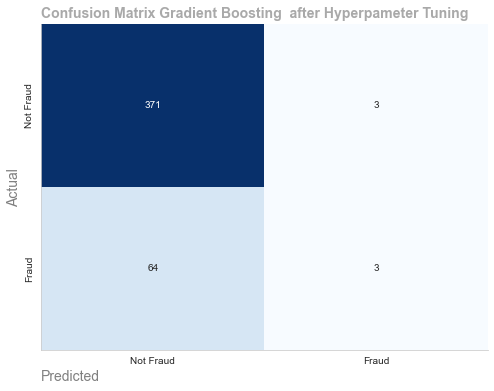

In [192]:
# apply our best parameters to our model
best_params= {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.01}

best_clf= GradientBoostingClassifier(**best_params)

best_clf.fit(X_train30, y_train30)

y_pred= best_clf.predict(X_test30)

accuracy=accuracy_score(y_test30,y_pred)
print(f'Accuracy  after hyperparameter training: {accuracy:.2f}')

print ('Classification Report after hyperparameter training :')
print(classification_report(y_test30, y_pred))

precision= precision_score(y_test30,y_pred)
recall=recall_score(y_test30,y_pred)

print(f'Precision after hyperparameter training: {precision: .2f}')
print(f'Recall after hyperparameter training: {recall:.2f}')

f1_value=f1_score(y_test30,y_pred)
print(f' F1 Score after hyperparameter training: {f1_value:.2f}')
cm = confusion_matrix(y_test30, y_pred)

# Create a heatmap of the confusion matrix using Seaborn

sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

plt.title('Confusion Matrix Gradient Boosting  after Hyperpameter Tuning',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()

# we have run a cross valuation to evaluate our preferred model with 5 splits

skfolds= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# creat a logistic regression classifier
logreg_clf= LogisticRegression(random_state=42)

# clobe the classifier
clone_logreg_clf=clone(logreg_clf)

# preform cross validation for accuracy, precision, recall
cv_scores_accuracy= cross_val_score(clone_clf,X_train20,y_train20, cv=skfolds, scoring='accuracy')
cv_scores_precision= cross_val_score(clone_clf,X_train20,y_train20, cv=skfolds, scoring='precision')
cv_scores_recall= cross_val_score(clone_clf,X_train20,y_train20, cv=skfolds, scoring='recall')
  

print(f' Cross_Validation mean Accuracy: {cv_scores_accuracy.mean():.4f}')
print(f' Cross_Validation mean Precision: {cv_scores_precision.mean():.4f}')
print(f' Cross_Validation mean Recall: {cv_scores_recall.mean():.4f}')
# get cross predictions for logistic regressor
y_train_pred_cv= cross_val_predict(clone_clf, X_train20, y_train20, cv = skfolds)
# compute confusion matris for confuion matrix
cm_cv=confusion_matrix(y_train20,y_train_pred_cv)

# plot the confusion matrix
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cv, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Employed', 'Left'],annot_kws={'size':20})

plt.title('Confusion Matrix after Cross Validation Logistic Regression',fontsize=13,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()

In [193]:
# we will carry out hypeermater tuning to improve our model
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 10, 100],
    'solver' : ['liblinear', 'saga'],

}
# Create a Gradient Boosting Classifier
logreg_clf = LogisticRegression(max_iter=1000)
# Peform randomized search ceoss Validation
random_search_logreg = RandomizedSearchCV(logreg_clf,param_distributions=params, n_iter=10, cv =5)

random_search_logreg.fit(X_train20,y_train20)
# Print the bes params
print(random_search_logreg.best_params_)

{'solver': 'liblinear', 'penalty': 'l2', 'C': 100}


Accuracy  after hyperparameter training: 0.85
Classification Report after hyperparameter training :
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.91       242
         1.0       0.89      0.15      0.26        52

    accuracy                           0.85       294
   macro avg       0.87      0.57      0.59       294
weighted avg       0.85      0.85      0.80       294

Precision after hyperparameter training:  0.89
Recall after hyperparameter training: 0.02
 F1 Score after hyperparameter training: 0.03


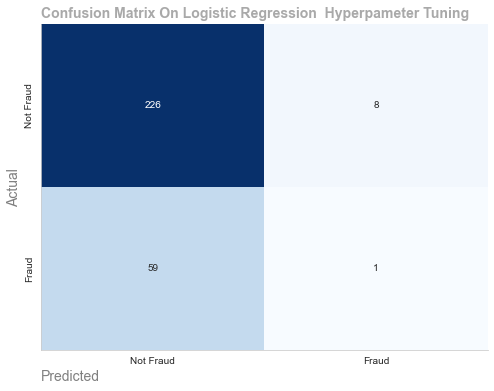

In [194]:
# apply our best parameters to our model
best_params={'solver': 'liblinear', 'penalty': 'l2', 'C': 100}

best_clf_log= LogisticRegression(**best_params)

best_clf_log.fit(X_train20, y_train20)

y_pred= best_clf.predict(X_test20)

accuracy=accuracy_score(y_test20,y_pred)
print(f'Accuracy  after hyperparameter training: {accuracy:.2f}')

print ('Classification Report after hyperparameter training :')
print(classification_report(y_test20, y_pred))

precision= precision_score(y_test20,y_pred)
recall=recall_score(y_test,y_pred)

print(f'Precision after hyperparameter training: {precision: .2f}')
print(f'Recall after hyperparameter training: {recall:.2f}')

f1_value=f1_score(y_test,y_pred)
print(f' F1 Score after hyperparameter training: {f1_value:.2f}')
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix using Seaborn

sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

plt.title('Confusion Matrix On Logistic Regression  Hyperpameter Tuning',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()

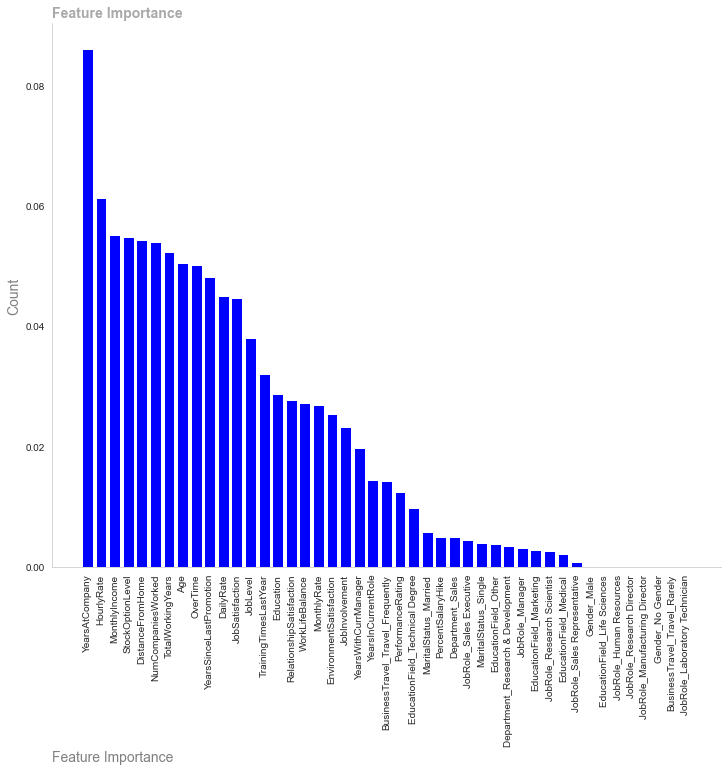

In [195]:
importances_gb = best_clf.feature_importances_
indices_gb = np.argsort(importances_gb)[::-1] # Sort feature importances in descending order
names = [X_train30.columns[i] for i in indices_gb] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(12, 10)) # Create plot

plt.bar(range(X_train30.shape[1]), importances_gb[indices_gb], color='b') # Add bars
plt.xticks(range(X_train30.shape[1]), names, rotation=90) # Add feature names as x-axis labels
# set the title
plt.title("Feature Importance",fontsize=14,fontweight='bold',color='darkgrey',loc='left')

#  set the x label and y label
plt.xlabel('Feature Importance ',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

#  remove the spine and grid
sns.despine()
plt.grid(False)
plt.show()
plt.show() # Show plot

#  Hamza b,2018.Building an Employee Churn Model in Python to Develop a Strategic Retention Plan..Available at: https://medium.com/towards-data-science/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d [Accesed] 14-12-2023]

In [196]:
importances = best_clf.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train20.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

#  Hamza b,2018.Building an Employee Churn Model in Python to Develop a Strategic Retention Plan..Available at: https://medium.com/towards-data-science/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d [Accesed] 14-12-2023]

,Feature,Coefficient
0,YearsAtCompany,0.085965
1,HourlyRate,0.061363
2,MonthlyIncome,0.055115
3,StockOptionLevel,0.054867
4,DistanceFromHome,0.054305
5,NumCompaniesWorked,0.053978
6,TotalWorkingYears,0.052326
7,Age,0.050478
8,OverTime,0.050167
9,YearsSinceLastPromotion,0.048080


Accuracy  test set: 0.85
Classification Report on test set :
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.91       242
         1.0       0.89      0.15      0.26        52

    accuracy                           0.85       294
   macro avg       0.87      0.57      0.59       294
weighted avg       0.85      0.85      0.80       294

Precision test set:  0.89
Recall test set: 0.15
 F1 Score on test set: 0.26


Text(0.5, 384.16, 'Predicted label')

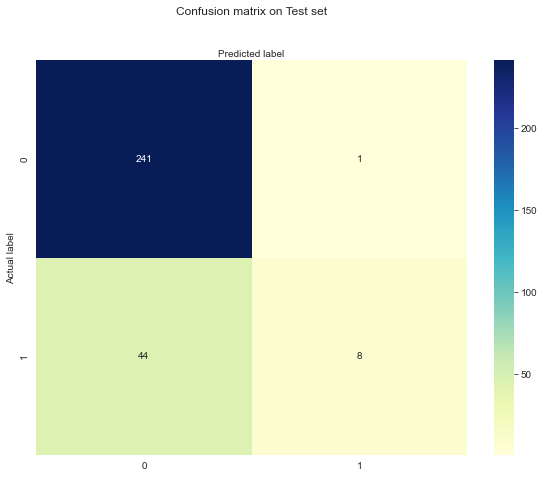

In [197]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test20, best_clf.predict(X_test20))
class_names=[0,1] # name  of classes

accuracy=accuracy_score(y_test20,best_clf.predict(X_test20))
print(f'Accuracy  test set: {accuracy:.2f}')

print ('Classification Report on test set :')
print(classification_report(y_test20,best_clf.predict(X_test20)))
      
precision= precision_score(y_test20,best_clf.predict(X_test20))
recall=recall_score(y_test20,best_clf.predict(X_test20))
      
print(f'Precision test set: {precision: .2f}')
print(f'Recall test set: {recall:.2f}')

      
f1_value=f1_score(y_test20,best_clf.predict(X_test20))
print(f' F1 Score on test set: {f1_value:.2f}')
      
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
      
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix on Test set', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [198]:
print('Accuracy of Gradient Boosting Classifier on test set: {:.2f}'.format(best_clf.score(X_test20, y_test20)*100))

Accuracy of Gradient Boosting Classifier on test set: 84.69


In [199]:
# Classification report for the optimised GB Regression
best_clf.fit(X_train20, y_train20)
print(classification_report(y_test20, best_clf.predict(X_test20)))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.90       242
         1.0       1.00      0.02      0.04        52

    accuracy                           0.83       294
   macro avg       0.91      0.51      0.47       294
weighted avg       0.86      0.83      0.75       294



In [200]:
best_clf.fit(X_train20, y_train20) # fit optimised model to the training data
probs = best_clf.predict_proba(X_test20) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
best_clf_roc_auc = roc_auc_score(y_test20, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % best_clf_roc_auc)

#  Hamza b,2018.Building an Employee Churn Model in Python to Develop a Strategic Retention Plan..Available at: https://medium.com/towards-data-science/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d [Accesed] 14-12-2023]

AUC score: 0.625


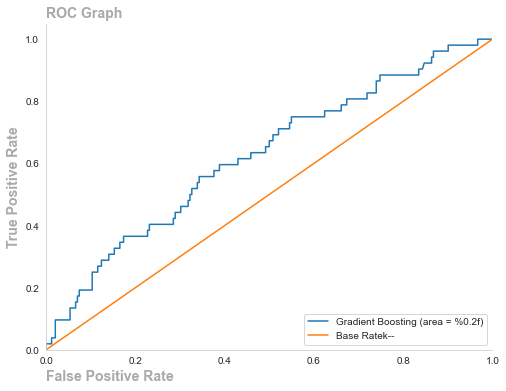

In [201]:
from sklearn.metrics import roc_curve

best_clf.fit(X_train20, y_train20)

probs=best_clf.predict_proba(X_test20)[:, 1]

gb_fpr,gb_tpr,tresholds=roc_curve(y_test20,probs)

roc_auc = roc_auc_score(y_test20,probs)

# 
# Plot Gradient Boosting ROC
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting (area = %0.2f)' .format(roc_auc))
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('True Positive Rate',fontsize=14,fontweight='bold',color='darkgrey')
plt.title('ROC Graph',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend(loc="lower right")
#  remove the spine and grid
sns.despine()
plt.grid(False)
plt.show()
plt.show() # Show plot
plt.show()

#  Hamza b,2018.Building an Employee Churn Model in Python to Develop a Strategic Retention Plan..Available at: https://medium.com/towards-data-science/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d [Accesed] 14-12-2023]

In [202]:
# get the shape of the df dataframe
df_param_coeff.shape

(44, 2)

In [203]:
# get the head of the df_param dataframe
df_param_coeff.head(10)

,Feature,Coefficient
0,YearsAtCompany,0.085965
1,HourlyRate,0.061363
2,MonthlyIncome,0.055115
3,StockOptionLevel,0.054867
4,DistanceFromHome,0.054305
5,NumCompaniesWorked,0.053978
6,TotalWorkingYears,0.052326
7,Age,0.050478
8,OverTime,0.050167
9,YearsSinceLastPromotion,0.048080


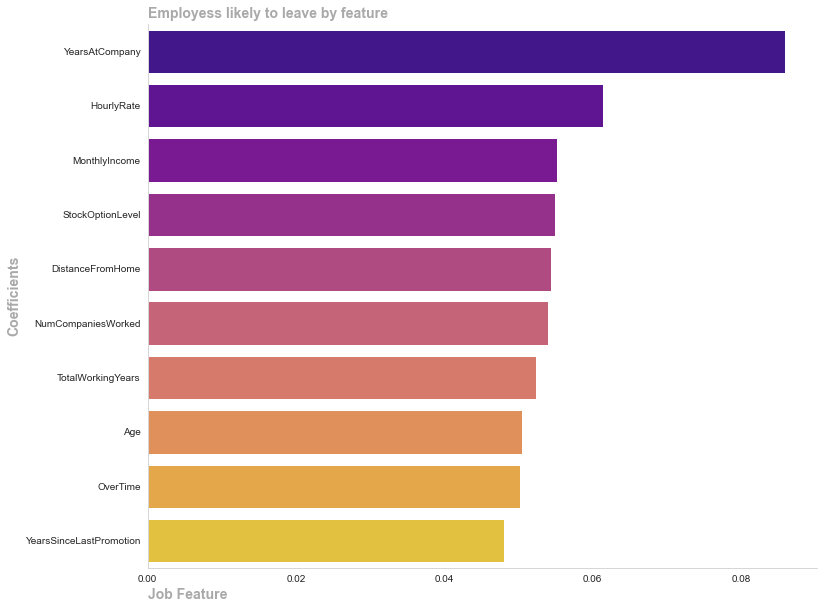

In [204]:
# set a figure size
plt.figure(figsize=(12, 10))
# create a horizontal barplot
sns.barplot(x='Coefficient',y= 'Feature', data=df_param_coeff.head(10), hue= 'Feature',palette='plasma', legend=False)

# set an x label and y label
plt.xlabel('Job Feature',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Coefficients',fontsize=14,fontweight='bold',color='darkgrey')
plt.title('Employess likely to leave by feature',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
#  remove the spine and grid
sns.despine()
plt.grid(False)
plt.show()



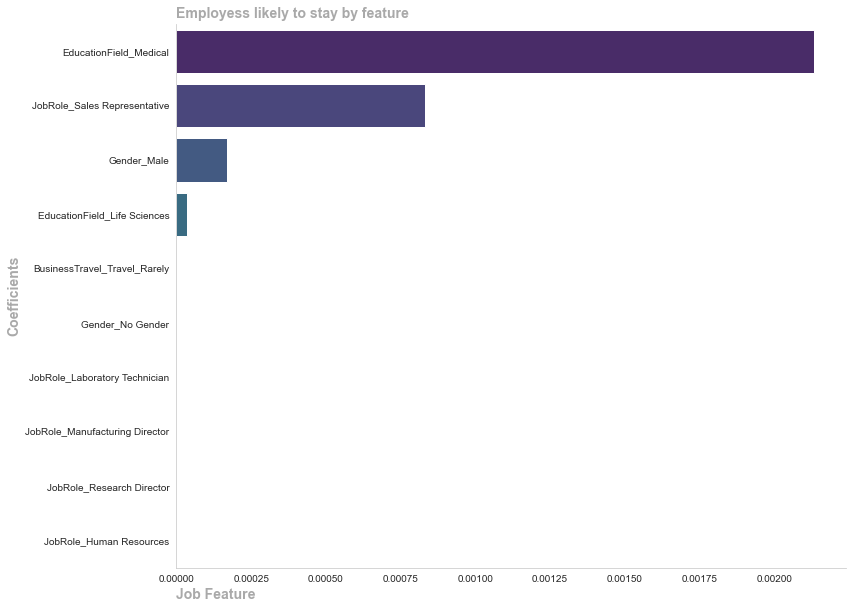

In [205]:
# set a figure sze
plt.figure(figsize=(12, 10))
# create a horizontal barplot
sns.barplot(x='Coefficient',y= 'Feature', data=df_param_coeff.tail(10), palette='viridis',hue='Feature', legend=False)
# set an x label and y label
plt.xlabel('Job Feature',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Coefficients',fontsize=14,fontweight='bold',color='darkgrey')
plt.title('Employess likely to stay by feature',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

#  remove the spine and grid
sns.despine()
plt.grid(False)
plt.show()


In [206]:
df_stat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime', 'Age', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DailyRate',
       'MonthlyIncome', 'MonthlyRate'],
      dtype='object')

In [207]:
df_stat.dtypes

Attrition                    object
BusinessTravel               object
Department                   object
EducationField               object
Gender                       object
JobRole                      object
MaritalStatus                object
OverTime                     object
Age                         float64
DistanceFromHome            float64
Education                   float64
EmployeeCount               float64
EmployeeNumber              float64
EnvironmentSatisfaction     float64
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobSatisfaction             float64
NumCompaniesWorked          float64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              

In [208]:
# get the head of the df_param dataframe
df_param_coeff.head(10)

,Feature,Coefficient
0,YearsAtCompany,0.085965
1,HourlyRate,0.061363
2,MonthlyIncome,0.055115
3,StockOptionLevel,0.054867
4,DistanceFromHome,0.054305
5,NumCompaniesWorked,0.053978
6,TotalWorkingYears,0.052326
7,Age,0.050478
8,OverTime,0.050167
9,YearsSinceLastPromotion,0.048080


In [209]:
from sklearn.preprocessing import LabelEncoder

In [210]:
df_stat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime', 'Age', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DailyRate',
       'MonthlyIncome', 'MonthlyRate'],
      dtype='object')

In [211]:
columns_to_copy=['Attrition','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
                      'HourlyRate','StockOptionLevel','MonthlyIncome','DistanceFromHome',
                      'Age','OverTime','YearsSinceLastPromotion']

stat_subset= df_stat[columns_to_copy].copy()
stat_subset.head()

,Attrition,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,HourlyRate,StockOptionLevel,MonthlyIncome,DistanceFromHome,Age,OverTime,YearsSinceLastPromotion
0,Yes,7.08,8.06,5.80,93.83,0.00,6438.95,1.02,41.92,Yes,0.00
1,No,1.11,8.97,10.07,52.30,1.10,4457.66,1.02,51.59,No,1.03
2,Yes,5.54,8.43,0.00,87.27,0.00,2124.55,2.20,33.13,Yes,0.00
3,No,0.77,7.66,8.44,56.38,0.00,2771.70,2.94,34.71,Yes,2.85
4,No,10.12,6.24,2.04,40.43,0.95,3254.60,1.99,24.79,No,2.50


In [212]:
df_stat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Yes,41.92,1.02,1.77,1.03,1.05,2.15,93.83,3.43,2.46,3.40,7.08,9.90,2.84,1.01,95.61,0.00,8.06,0.00,1.05,5.80,3.99,0.00,4.59,990.11,6438.95,20845.10
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,51.59,1.02,1.04,0.94,2.11,3.47,52.30,1.81,1.79,1.58,1.11,9.90,4.12,4.31,85.37,1.10,8.97,3.26,2.53,10.07,7.94,1.03,5.90,276.78,4457.66,24877.90
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,33.13,2.20,2.12,0.81,4.01,3.98,87.27,1.88,0.83,3.30,5.54,15.40,2.78,2.33,76.25,0.00,8.43,3.00,2.92,0.00,0.00,0.00,0.00,1204.16,2124.55,2262.94
3,No,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,Yes,34.71,2.94,3.67,0.82,4.59,3.73,56.38,2.93,1.10,3.22,0.77,9.76,2.77,3.03,75.89,0.00,7.66,2.86,3.12,8.44,5.56,2.85,0.00,1352.75,2771.70,27189.91
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,24.79,1.99,1.12,0.82,7.23,1.08,40.43,3.12,0.94,1.70,10.12,11.92,3.28,3.03,72.67,0.95,6.24,2.81,3.11,2.04,1.97,2.50,2.22,485.05,3254.60,17675.54


In [213]:
stat_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                1470 non-null   object 
 1   NumCompaniesWorked       1470 non-null   float64
 2   TotalWorkingYears        1470 non-null   float64
 3   YearsAtCompany           1470 non-null   float64
 4   HourlyRate               1470 non-null   float64
 5   StockOptionLevel         1470 non-null   float64
 6   MonthlyIncome            1470 non-null   float64
 7   DistanceFromHome         1470 non-null   float64
 8   Age                      1470 non-null   float64
 9   OverTime                 1470 non-null   object 
 10  YearsSinceLastPromotion  1470 non-null   float64
dtypes: float64(9), object(2)
memory usage: 126.5+ KB


In [214]:
columns_to_encode = ['OverTime','Attrition']

label_encoder= LabelEncoder()

for column in columns_to_encode:
    stat_subset[column] = label_encoder.fit_transform(stat_subset[column])

In [215]:
stat_subset=stat_subset.astype(int)

In [216]:
stat_subset.head()

,Attrition,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,HourlyRate,StockOptionLevel,MonthlyIncome,DistanceFromHome,Age,OverTime,YearsSinceLastPromotion
0,1,7,8,5,93,0,6438,1,41,1,0
1,0,1,8,10,52,1,4457,1,51,0,1
2,1,5,8,0,87,0,2124,2,33,1,0
3,0,0,7,8,56,0,2771,2,34,1,2
4,0,10,6,2,40,0,3254,1,24,0,2


In [217]:
stat_subset.shape

(1470, 11)

In [218]:
stat_subset.isnull().sum()

Attrition                  0
NumCompaniesWorked         0
TotalWorkingYears          0
YearsAtCompany             0
HourlyRate                 0
StockOptionLevel           0
MonthlyIncome              0
DistanceFromHome           0
Age                        0
OverTime                   0
YearsSinceLastPromotion    0
dtype: int64

In [219]:
# Summary of each numerical attribute
stat_subset.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
Attrition,1470.0,0.18,0.38,0.0,0.00,0.0,0.0,1.0
NumCompaniesWorked,1470.0,2.24,2.47,0.0,0.00,1.0,3.0,10.0
TotalWorkingYears,1470.0,10.99,8.04,0.0,6.00,9.0,15.0,47.0
YearsAtCompany,1470.0,6.43,6.05,0.0,2.00,5.0,9.0,36.0
HourlyRate,1470.0,64.97,21.34,23.0,47.00,64.0,82.0,123.0
StockOptionLevel,1470.0,0.53,0.77,0.0,0.00,0.0,1.0,3.0
MonthlyIncome,1470.0,6385.50,4546.83,891.0,3177.25,4957.0,7588.0,22858.0
DistanceFromHome,1470.0,8.69,8.24,0.0,2.00,6.0,13.0,33.0
Age,1470.0,36.27,9.91,14.0,29.00,35.0,42.0,69.0
OverTime,1470.0,0.27,0.44,0.0,0.00,0.0,1.0,1.0


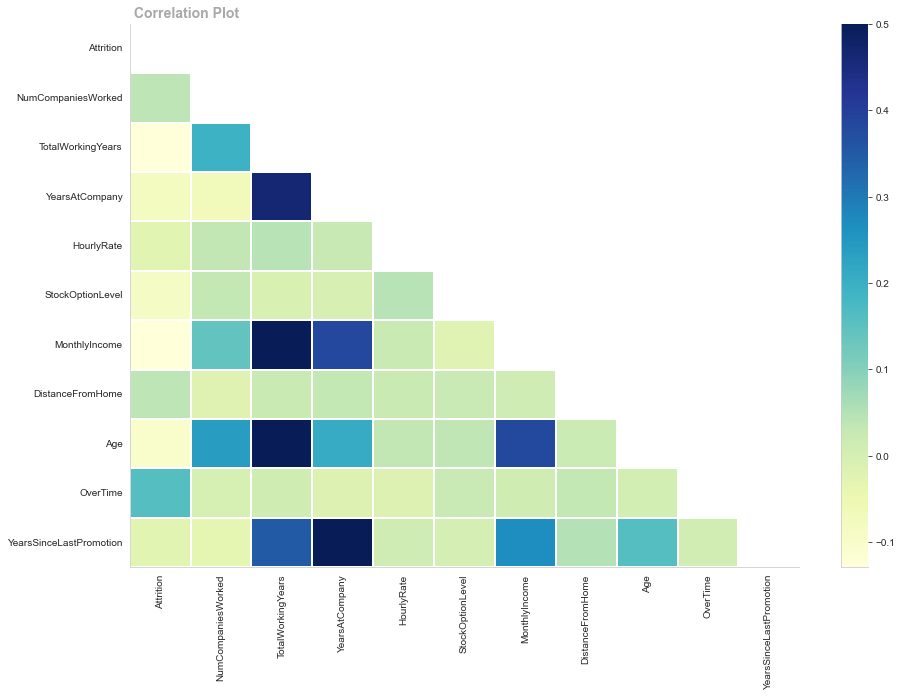

In [220]:
# Calculate correlations
corr = stat_subset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

# Adding a title to the plot
plt.title(' Correlation Plot ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)

In [221]:
mean_YearsAtCompany=stat_subset['YearsAtCompany'].mean()
median_YearsAtCompany=stat_subset['YearsAtCompany'].median()
std_YearsAtCompany=stat_subset['YearsAtCompany'].std()
skew_YearsAtCompany=stat_subset['YearsAtCompany'].skew()
kurtosis_YearsAtCompany=stat_subset['YearsAtCompany'].kurtosis()


percentiles= [0.25,0.50,0.75]
age_percentiles= stat_subset['YearsAtCompany'].quantile(percentiles)

print(f"Mean Years at Company is:{mean_YearsAtCompany}")
print(f"Median Years at Company is:{median_YearsAtCompany}")
print(f"Standard Deviation is:{std_YearsAtCompany}")
print(f"Median Years at company is:{median_YearsAtCompany}")
print(f"Skew is:{skew_YearsAtCompany}")
print(f"kurtosis is:{kurtosis_YearsAtCompany}")
print('Age Percentiles')
for percentile, YearsAtCompany in zip(percentiles,age_percentiles):
    print(f"{percentiles}th Percentile: {YearsAtCompany}")

Mean Years at Company is:6.427210884353742
Median Years at Company is:5.0
Standard Deviation is:6.045646176270098
Median Years at company is:5.0
Skew is:1.70086148136926
kurtosis is:3.488393990403337
Age Percentiles
[0.25, 0.5, 0.75]th Percentile: 2.0
[0.25, 0.5, 0.75]th Percentile: 5.0
[0.25, 0.5, 0.75]th Percentile: 9.0


In [222]:
stat_subset.dtypes

Attrition                  int32
NumCompaniesWorked         int32
TotalWorkingYears          int32
YearsAtCompany             int32
HourlyRate                 int32
StockOptionLevel           int32
MonthlyIncome              int32
DistanceFromHome           int32
Age                        int32
OverTime                   int32
YearsSinceLastPromotion    int32
dtype: object

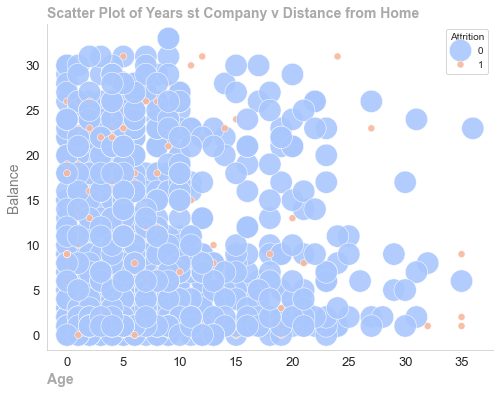

In [223]:
x = stat_subset['YearsAtCompany']
y = stat_subset['DistanceFromHome']
hue = stat_subset['Attrition']
size=stat_subset['Attrition']
plt.figure(figsize=(8,6))
sns.scatterplot(x=x, y=y, hue=hue, size=hue, sizes=(50,500), alpha=0.9, palette='coolwarm')
plt.xlabel('Age',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Balance',fontsize=14,color= 'grey')
plt.title('Scatter Plot of Years st Company v Distance from Home',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine()
plt.grid(False)
plt.show()

In [224]:
stat_subset.dtypes

Attrition                  int32
NumCompaniesWorked         int32
TotalWorkingYears          int32
YearsAtCompany             int32
HourlyRate                 int32
StockOptionLevel           int32
MonthlyIncome              int32
DistanceFromHome           int32
Age                        int32
OverTime                   int32
YearsSinceLastPromotion    int32
dtype: object

In [225]:
frequency_table= stat_subset['YearsAtCompany'].value_counts().sort_index().head(10)

print('Frequency Table for YearsAtCompany')
print(frequency_table)

Frequency Table for YearsAtCompany
YearsAtCompany
0    141
1    140
2    130
3    121
4    152
5    141
6    102
7     67
8     94
9     75
Name: count, dtype: int64


In [226]:
years_at_company_bins=[5,10,15,20,25,30]
years_labels=['0-5','6-10','11-15','16-20','21-25']
stat_subset['YearsAtCompany']= pd.cut(stat_subset['YearsAtCompany'], bins=years_at_company_bins, labels=years_labels, include_lowest=True)

contingency_table= pd.crosstab(stat_subset['YearsAtCompany'],stat_subset['Attrition'], margins=True)
print(contingency_table)

Attrition         0    1  All
YearsAtCompany               
0-5             461   82  543
6-10             93   16  109
11-15            66    8   74
16-20            37    2   39
21-25            10    1   11
All             667  109  776


In [227]:
probabilities=contingency_table/contingency_table.loc['All']
print(probabilities)

Attrition              0         1       All
YearsAtCompany                              
0-5             0.691154  0.752294  0.699742
6-10            0.139430  0.146789  0.140464
11-15           0.098951  0.073394  0.095361
16-20           0.055472  0.018349  0.050258
21-25           0.014993  0.009174  0.014175
All             1.000000  1.000000  1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

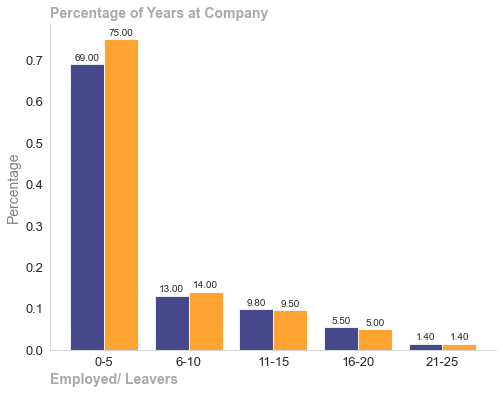

In [228]:
colors=['midnightblue','darkorange']
age_groups=['0-5','6-10','11-15','16-20','21-25']
employed_0 = [0.69,0.13,0.098,0.055,.014]
leavers_1 =[0.75,0.14,.095,.05,.014]
width=0.40
x= range(len(age_groups))
fig,ax = plt.subplots(figsize=(8,6))
bar1= ax.bar(x,employed_0,width,label='Employed', alpha=0.8, color=colors[0])
bar2= ax.bar([i + width for i in x],leavers_1,width,label='Leavers', alpha=.8, color=colors[1])
ax.set_xlabel('Employed/ Leavers',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
ax.set_ylabel('Percentage',fontsize=14,color= 'grey')
ax.set_title('Percentage of Years at Company',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
ax.set_xticks([i+ width/2 for i in x])
ax.set_xticklabels(age_groups)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend
for i in x:
    ax.text(i,employed_0[i] + 0.01/2, f'{employed_0[i]*100:.2f}', ha='center',va='bottom')
    ax.text(i + width,leavers_1[i] + 0.01/2, f'{leavers_1[i]*100:.2f}', ha='center',va='bottom')   
sns.despine()
plt.grid(False)
plt.show

In [229]:
frequency_table= stat_subset['HourlyRate'].value_counts().sort_index().head(10)

print('Frequency Table for HourlyRate')
print(frequency_table)

Frequency Table for HourlyRate
HourlyRate
23     1
24     2
26     4
27     4
28    11
29    13
30    13
31    10
32    15
33    18
Name: count, dtype: int64


In [230]:
mean_YearsAtCompany=stat_subset['HourlyRate'].mean()
median_YearsAtCompany=stat_subset['HourlyRate'].median()
std_YearsAtCompany=stat_subset['HourlyRate'].std()
skew_YearsAtCompany=stat_subset['HourlyRate'].skew()
kurtosis_YearsAtCompany=stat_subset['HourlyRate'].kurtosis()


percentiles= [0.25,0.50,0.75]
age_percentiles= stat_subset['HourlyRate'].quantile(percentiles)

print(f"Mean HourlyRate at Company is:{mean_YearsAtCompany}")
print(f"Median HourlyRate at Company is:{median_YearsAtCompany}")
print(f"Standard Deviation is:{std_YearsAtCompany}")
print(f"Median HourlyRate at company is:{median_YearsAtCompany}")
print(f"Skew is:{skew_YearsAtCompany}")
print(f"kurtosis is:{kurtosis_YearsAtCompany}")
print('HourlyRate')
for percentile, YearsAtCompany in zip(percentiles,age_percentiles):
    print(f"{percentiles}th Percentile: {YearsAtCompany}")

Mean HourlyRate at Company is:64.97414965986394
Median HourlyRate at Company is:64.0
Standard Deviation is:21.343171870449364
Median HourlyRate at company is:64.0
Skew is:0.11440218104277446
kurtosis is:-0.9606806500063194
HourlyRate
[0.25, 0.5, 0.75]th Percentile: 47.0
[0.25, 0.5, 0.75]th Percentile: 64.0
[0.25, 0.5, 0.75]th Percentile: 82.0


In [231]:
years_at_company_bins=[25,50,75,100,150]
years_labels=['0-25','26-50','51-75','76-100']
stat_subset['HourlyRate']= pd.cut(stat_subset['HourlyRate'], bins=years_at_company_bins, labels=years_labels, include_lowest=True)

contingency_table= pd.crosstab(stat_subset['HourlyRate'],stat_subset['Attrition'], margins=True)
print(contingency_table)

Attrition      0    1   All
HourlyRate                 
0-25         354   86   440
26-50        424   88   512
51-75        377   76   453
76-100        55    7    62
All         1210  257  1467


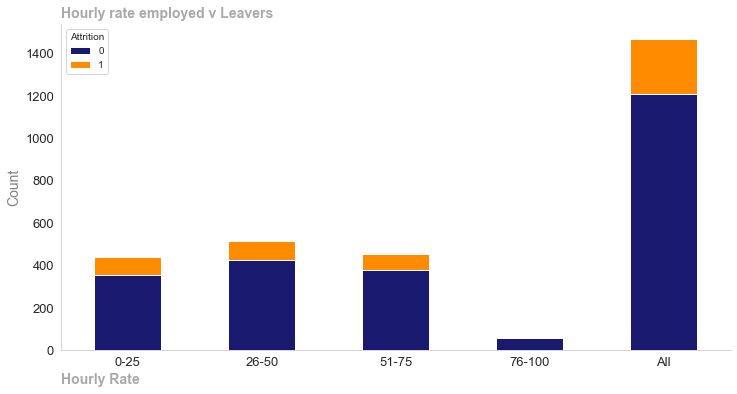

In [232]:
colors=['midnightblue','darkorange']
sns.set_style('whitegrid')
count_data=contingency_table.drop('All',axis=1)
count_data.plot(kind='bar', stacked=True, figsize=(12,6),color=colors)
plt.xlabel('Hourly Rate',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Hourly rate employed v Leavers',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)
plt.xticks(fontsize=13,rotation=0)
plt.yticks(fontsize=13)
plt.show()

In [233]:
frequency_table= stat_subset['MonthlyIncome'].value_counts().sort_index().head(10)

print('Frequency Table for Monthly Income')
print(frequency_table)

Frequency Table for Monthly Income
MonthlyIncome
891     1
974     1
1008    1
1133    1
1150    1
1163    1
1167    1
1169    1
1205    1
1243    1
Name: count, dtype: int64


In [234]:
mean_YearsAtCompany=stat_subset['MonthlyIncome'].mean()
median_YearsAtCompany=stat_subset['MonthlyIncome'].median()
std_YearsAtCompany=stat_subset['MonthlyIncome'].std()
skew_YearsAtCompany=stat_subset['MonthlyIncome'].skew()
kurtosis_YearsAtCompany=stat_subset['MonthlyIncome'].kurtosis()


percentiles= [0.25,0.50,0.75]
age_percentiles= stat_subset['MonthlyIncome'].quantile(percentiles)

print(f"Mean MonthlyIncome at Company is:{mean_YearsAtCompany}")
print(f"Median MonthlyIncomeat Company is:{median_YearsAtCompany}")
print(f"Standard Deviation is:{std_YearsAtCompany}")
print(f"Median MonthlyIncome at company is:{median_YearsAtCompany}")
print(f"Skew is:{skew_YearsAtCompany}")
print(f"kurtosis is:{kurtosis_YearsAtCompany}")
print('MonthlyIncome')
for percentile, YearsAtCompany in zip(percentiles,age_percentiles):
    print(f"{percentiles}th Percentile: {YearsAtCompany}")

Mean MonthlyIncome at Company is:6385.496598639455
Median MonthlyIncomeat Company is:4957.0
Standard Deviation is:4546.827621203466
Median MonthlyIncome at company is:4957.0
Skew is:1.562916997702472
kurtosis is:1.842826615527795
MonthlyIncome
[0.25, 0.5, 0.75]th Percentile: 3177.25
[0.25, 0.5, 0.75]th Percentile: 4957.0
[0.25, 0.5, 0.75]th Percentile: 7588.0


In [235]:
bins=[2500,5000,7500,10000,15000]
labels=['0-2500','2501-5000','5001-7500','7501-15000']
stat_subset['MonthlyIncome']= pd.cut(stat_subset['MonthlyIncome'], bins=bins, labels=labels, include_lowest=True)

contingency_table= pd.crosstab(stat_subset['MonthlyIncome'],stat_subset['Attrition'], margins=True)
print(contingency_table)

Attrition        0    1   All
MonthlyIncome                
0-2500         498  106   604
2501-5000      247   36   283
5001-7500      104   20   124
7501-15000     108   21   129
All            957  183  1140


In [236]:
# Create prabalities tables
probabilities=contingency_table/contingency_table.loc['All']
print(probabilities)

Attrition             0         1       All
MonthlyIncome                              
0-2500         0.520376  0.579235  0.529825
2501-5000      0.258098  0.196721  0.248246
5001-7500      0.108673  0.109290  0.108772
7501-15000     0.112853  0.114754  0.113158
All            1.000000  1.000000  1.000000


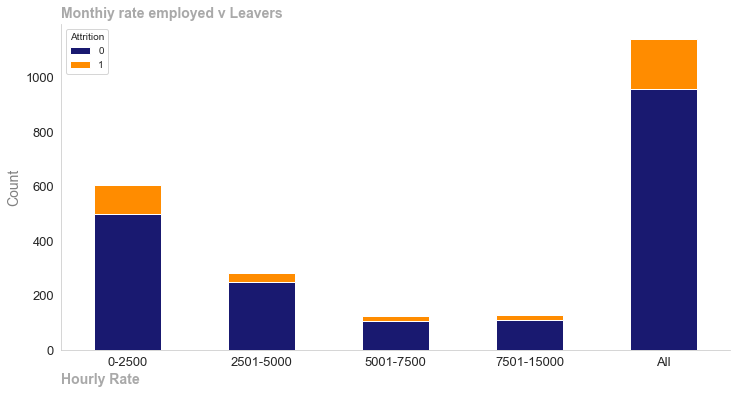

In [237]:
colors=['midnightblue','darkorange']
sns.set_style('whitegrid')
count_data=contingency_table.drop('All',axis=1)
count_data.plot(kind='bar', stacked=True, figsize=(12,6),color=colors)
plt.xlabel('Hourly Rate',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Monthiy rate employed v Leavers',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13)
plt.show()

In [238]:
mean_age=stat_subset['Age'].mean()
median_age=stat_subset['Age'].median()
std_age=stat_subset['Age'].std()
skew_df=stat_subset['Age'].skew()
kurtosis_df=stat_subset['Age'].kurtosis()


percentiles= [0.25,0.50,0.75]
age_percentiles= stat_subset['Age'].quantile(percentiles)

print(f"Mean Age is:{mean_age}")
print(f"Median Age is:{median_age}")
print(f"Standard Deviation is:{std_age}")
print(f"Median Age is:{median_age}")
print(f"Skew is:{skew_df}")
print(f"kurtosis is:{kurtosis_df}")
print('Age Percentiles')
for percentile, age_value in zip(percentiles,age_percentiles):
    print(f"{percentiles}th Percentile: {age_value}")

Mean Age is:36.268027210884355
Median Age is:35.0
Standard Deviation is:9.90597035419606
Median Age is:35.0
Skew is:0.5714566185560246
kurtosis is:-0.05005126803281401
Age Percentiles
[0.25, 0.5, 0.75]th Percentile: 29.0
[0.25, 0.5, 0.75]th Percentile: 35.0
[0.25, 0.5, 0.75]th Percentile: 42.0


In [239]:
frequency_table= stat_subset['Age'].value_counts().sort_index().head(10)

print('Frequency Table for Age')
print(frequency_table)

Frequency Table for Age
Age
14     2
16     5
17     1
18     8
19    10
20    11
21    27
22    25
23    16
24    35
Name: count, dtype: int64


In [240]:
# Identify age bins and labels
age_bins=[20,30,40,50,60]
age_labels=['20-29','30-39','40-49','50-59']
# Create new dataframe with age binned
stat_subset['Age_binned']= pd.cut(stat_subset['Age'], bins=age_bins, labels=age_labels, include_lowest=True)
# use crosstab to contigency table
contingency_table= pd.crosstab(stat_subset['Age_binned'],stat_subset['Attrition'], margins=True)
print(contingency_table)

Attrition      0    1   All
Age_binned                 
20-29        324   92   416
30-39        483  102   585
40-49        260   32   292
50-59        108   23   131
All         1175  249  1424


In [241]:
# Create prabalities tables
probabilities=contingency_table/contingency_table.loc['All']
print(probabilities)

Attrition          0         1       All
Age_binned                              
20-29       0.275745  0.369478  0.292135
30-39       0.411064  0.409639  0.410815
40-49       0.221277  0.128514  0.205056
50-59       0.091915  0.092369  0.091994
All         1.000000  1.000000  1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

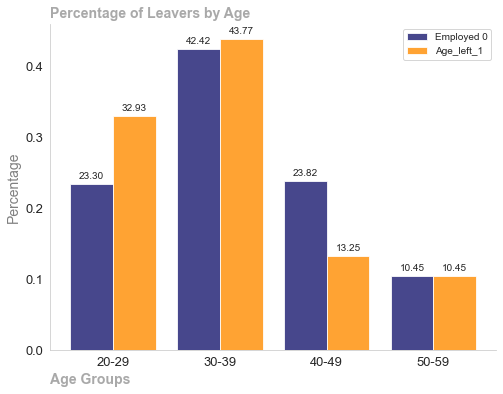

In [242]:
# Create custom colors for histogram
colors=['midnightblue','darkorange']
age_groups=['20-29','30-39','40-49','50-59']
age_employed_0 = [0.233,0.42416,0.2382,0.1045]
Age_left_1 =[0.3293,0.4377,0.1325,0.1045]
width=0.40
x= range(len(age_groups))
# Creat size for histogram
fig,ax = plt.subplots(figsize=(8,6))

# creatr barplotss
bar1= ax.bar(x,age_employed_0,width,label='Employed 0', alpha=0.8, color=colors[0])
bar2= ax.bar([i + width for i in x],Age_left_1,width,label='Age_left_1', alpha=.8, color=colors[1])

# set x and y labels
ax.set_xlabel('Age Groups',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
ax.set_ylabel('Percentage',fontsize=14,color= 'grey')
ax.set_title('Percentage of Leavers by Age',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
ax.set_xticks([i+ width/2 for i in x])
ax.set_xticklabels(age_groups)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend()
for i in x:
    ax.text(i,age_employed_0[i] + 0.01/2, f'{age_employed_0[i]*100:.2f}', ha='center',va='bottom')
    ax.text(i + width,Age_left_1[i] + 0.01/2, f'{Age_left_1[i]*100:.2f}', ha='center',va='bottom')   
sns.despine()
plt.grid(False)
plt.show

In [243]:
mean_age=stat_subset['StockOptionLevel'].mean()
median_age=stat_subset['StockOptionLevel'].median()
std_age=stat_subset['StockOptionLevel'].std()
skew_df=stat_subset['StockOptionLevel'].skew()
kurtosis_df=stat_subset['StockOptionLevel'].kurtosis()


percentiles= [0.25,0.50,0.75]
age_percentiles= stat_subset['StockOptionLevel'].quantile(percentiles)

print(f"Mean StockOptionLevel is:{mean_age}")
print(f"Median StockOptionLevel is:{median_age}")
print(f"Standard Deviation is:{std_age}")
print(f"Median StockOptionLevel is:{median_age}")
print(f"Skew is:{skew_df}")
print(f"kurtosis is:{kurtosis_df}")
print('Age Percentiles')
for percentile, age_value in zip(percentiles,age_percentiles):
    print(f"{percentiles}th Percentile: {age_value}")

Mean StockOptionLevel is:0.5299319727891156
Median StockOptionLevel is:0.0
Standard Deviation is:0.7687670117206615
Median StockOptionLevel is:0.0
Skew is:1.3712987323309758
kurtosis is:1.191017688817292
Age Percentiles
[0.25, 0.5, 0.75]th Percentile: 0.0
[0.25, 0.5, 0.75]th Percentile: 0.0
[0.25, 0.5, 0.75]th Percentile: 1.0


In [244]:
frequency_table= stat_subset['StockOptionLevel'].value_counts().sort_index()

print('Frequency Table for StockOptionLevel')
print(frequency_table)

Frequency Table for StockOptionLevel
StockOptionLevel
0    904
1    391
2    137
3     38
Name: count, dtype: int64


In [245]:
mean_age=stat_subset['NumCompaniesWorked'].mean()
median_age=stat_subset['NumCompaniesWorked'].median()
std_age=stat_subset['NumCompaniesWorked'].std()
skew_df=stat_subset['NumCompaniesWorked'].skew()
kurtosis_df=stat_subset['NumCompaniesWorked'].kurtosis()


percentiles= [0.25,0.50,0.75]
age_percentiles= stat_subset['NumCompaniesWorked'].quantile(percentiles)

print(f"Mean NumCompaniesWorked is:{mean_age}")
print(f"Median NumCompaniesWorked is:{median_age}")
print(f"Standard Deviation is:{std_age}")
print(f"Median NumCompaniesWorked is:{median_age}")
print(f"Skew is:{skew_df}")
print(f"kurtosis is:{kurtosis_df}")
print('Age Percentiles')
for percentile, age_value in zip(percentiles,age_percentiles):
    print(f"{percentiles}th Percentile: {age_value}")

Mean NumCompaniesWorked is:2.242857142857143
Median NumCompaniesWorked is:1.0
Standard Deviation is:2.4733157246756674
Median NumCompaniesWorked is:1.0
Skew is:1.103401259152742
kurtosis is:0.19905150437966856
Age Percentiles
[0.25, 0.5, 0.75]th Percentile: 0.0
[0.25, 0.5, 0.75]th Percentile: 1.0
[0.25, 0.5, 0.75]th Percentile: 3.0


In [246]:
frequency_table= stat_subset['NumCompaniesWorked'].value_counts().sort_index()

print('Frequency Table for NUMCompaniesWorked')
print(frequency_table)

Frequency Table for NUMCompaniesWorked
NumCompaniesWorked
0     457
1     339
2     156
3     153
4      92
5      63
6      66
7      71
8      50
9      19
10      4
Name: count, dtype: int64


In [247]:
mean_age=stat_subset['DistanceFromHome'].mean()
median_age=stat_subset['DistanceFromHome'].median()
std_age=stat_subset['DistanceFromHome'].std()
skew_df=stat_subset['DistanceFromHome'].skew()
kurtosis_df=stat_subset['DistanceFromHome'].kurtosis()


percentiles= [0.25,0.50,0.75]
age_percentiles= stat_subset['DistanceFromHome'].quantile(percentiles)

print(f"Mean DistanceFromHome is:{mean_age}")
print(f"Median DistanceFromHome is:{median_age}")
print(f"Standard Deviation is:{std_age}")
print(f"Median DistanceFromHome is:{median_age}")
print(f"Skew is:{skew_df}")
print(f"kurtosis is:{kurtosis_df}")
print('Age Percentiles')
for percentile, age_value in zip(percentiles,age_percentiles):
    print(f"{percentiles}th Percentile: {age_value}")

Mean DistanceFromHome is:8.68639455782313
Median DistanceFromHome is:6.0
Standard Deviation is:8.237639125393605
Median DistanceFromHome is:6.0
Skew is:1.0082165558109475
kurtosis is:-0.06325832026833877
Age Percentiles
[0.25, 0.5, 0.75]th Percentile: 2.0
[0.25, 0.5, 0.75]th Percentile: 6.0
[0.25, 0.5, 0.75]th Percentile: 13.0


In [248]:
# Identify age bins and labels
bins=[2,4,6,10,20,30]
labels=['0-4','4-6','6-10','11-20','21-30']
# Create new dataframe with age binned
stat_subset['DistanceFromHome']= pd.cut(stat_subset['DistanceFromHome'], bins=bins, labels=labels, include_lowest=True)
# use crosstab to contigency table
contingency_table= pd.crosstab(stat_subset['DistanceFromHome'],stat_subset['Attrition'], margins=True)
print(contingency_table)

Attrition           0    1   All
DistanceFromHome                
0-4               263   46   309
4-6               102   19   121
6-10              238   55   293
11-20             193   46   239
21-30             153   37   190
All               949  203  1152


In [249]:
# Create prabalities tables
probabilities=contingency_table/contingency_table.loc['All']
print(probabilities)

Attrition                0         1       All
DistanceFromHome                              
0-4               0.277134  0.226601  0.268229
4-6               0.107482  0.093596  0.105035
6-10              0.250790  0.270936  0.254340
11-20             0.203372  0.226601  0.207465
21-30             0.161222  0.182266  0.164931
All               1.000000  1.000000  1.000000


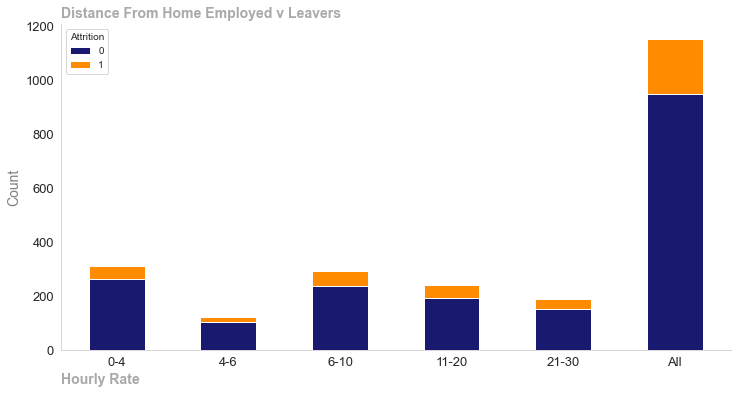

In [250]:
colors=['midnightblue','darkorange']
sns.set_style('whitegrid')
count_data=contingency_table.drop('All',axis=1)
count_data.plot(kind='bar', stacked=True, figsize=(12,6),color=colors)
plt.xlabel('Hourly Rate',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Distance From Home Employed v Leavers',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)
plt.xticks(fontsize=13,rotation=0)
plt.yticks(fontsize=13)
plt.show()

In [251]:
mean_age=stat_subset['YearsSinceLastPromotion'].mean()
median_age=stat_subset['YearsSinceLastPromotion'].median()
std_age=stat_subset['YearsSinceLastPromotion'].std()
skew_df=stat_subset['YearsSinceLastPromotion'].skew()
kurtosis_df=stat_subset['YearsSinceLastPromotion'].kurtosis()


percentiles= [0.25,0.50,0.75]
age_percentiles= stat_subset['YearsSinceLastPromotion'].quantile(percentiles)

print(f"Mean YearsSinceLastPromotion is:{mean_age}")
print(f"Median YearsSinceLastPromotion is:{median_age}")
print(f"Standard Deviation is:{std_age}")
print(f"Median YearsSinceLastPromotion is:{median_age}")
print(f"Skew is:{skew_df}")
print(f"kurtosis is:{kurtosis_df}")
print('Age Percentiles')
for percentile, age_value in zip(percentiles,age_percentiles):
    print(f"{percentiles}th Percentile: {age_value}")

Mean YearsSinceLastPromotion is:1.9346938775510205
Median YearsSinceLastPromotion is:0.0
Standard Deviation is:3.1620333881675293
Median YearsSinceLastPromotion is:0.0
Skew is:2.0636092744314474
kurtosis is:3.996706272723284
Age Percentiles
[0.25, 0.5, 0.75]th Percentile: 0.0
[0.25, 0.5, 0.75]th Percentile: 0.0
[0.25, 0.5, 0.75]th Percentile: 2.0


In [252]:
frequency_table= stat_subset['YearsSinceLastPromotion'].value_counts().sort_index().head(10)

print('Frequency Table for YearsSinceLastPromotion')
print(frequency_table)

Frequency Table for YearsSinceLastPromotion
YearsSinceLastPromotion
0    753
1    253
2    105
3     60
4     58
5     29
6     59
7     55
8     12
9     17
Name: count, dtype: int64


In [253]:
# Identify age bins and labels
bins=[1,2,3,4,5,6,7,8,9,10]
labels=['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9']
# Create new dataframe with age binned
stat_subset['YearsSinceLastPromotion']= pd.cut(stat_subset['YearsSinceLastPromotion'], bins=bins, labels=labels, include_lowest=True)
# use crosstab to contigency table
contingency_table= pd.crosstab(stat_subset['YearsSinceLastPromotion'],stat_subset['Attrition'], margins=True)
print(contingency_table)

Attrition                  0    1  All
YearsSinceLastPromotion               
0-1                      290   68  358
1-2                       46   14   60
2-3                       53    5   58
3-4                       27    2   29
4-5                       46   13   59
5-6                       46    9   55
6-7                       11    1   12
7-8                       15    2   17
8-9                       14    2   16
All                      548  116  664


In [254]:
# Create prabalities tables
probabilities=contingency_table/contingency_table.loc['All']
print(probabilities)

Attrition                       0         1       All
YearsSinceLastPromotion                              
0-1                      0.529197  0.586207  0.539157
1-2                      0.083942  0.120690  0.090361
2-3                      0.096715  0.043103  0.087349
3-4                      0.049270  0.017241  0.043675
4-5                      0.083942  0.112069  0.088855
5-6                      0.083942  0.077586  0.082831
6-7                      0.020073  0.008621  0.018072
7-8                      0.027372  0.017241  0.025602
8-9                      0.025547  0.017241  0.024096
All                      1.000000  1.000000  1.000000


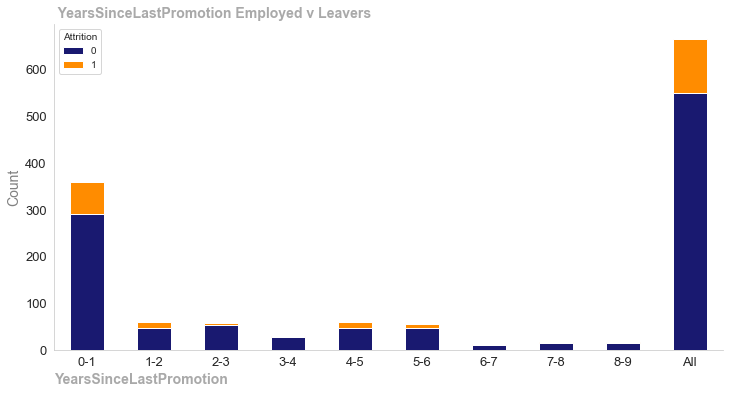

In [255]:
colors=['midnightblue','darkorange']
sns.set_style('whitegrid')
count_data=contingency_table.drop('All',axis=1)
count_data.plot(kind='bar', stacked=True, figsize=(12,6),color=colors)
plt.xlabel('YearsSinceLastPromotion',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title(' YearsSinceLastPromotion Employed v Leavers',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13)
plt.show()

In [256]:
df_stat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime', 'Age', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DailyRate',
       'MonthlyIncome', 'MonthlyRate'],
      dtype='object')

In [257]:
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1470 non-null   object 
 1   BusinessTravel            1470 non-null   object 
 2   Department                1470 non-null   object 
 3   EducationField            1470 non-null   object 
 4   Gender                    1470 non-null   object 
 5   JobRole                   1470 non-null   object 
 6   MaritalStatus             1470 non-null   object 
 7   OverTime                  1470 non-null   object 
 8   Age                       1470 non-null   float64
 9   DistanceFromHome          1470 non-null   float64
 10  Education                 1470 non-null   float64
 11  EmployeeCount             1470 non-null   float64
 12  EmployeeNumber            1470 non-null   float64
 13  EnvironmentSatisfaction   1470 non-null   float64
 14  HourlyRa

In [258]:
columns_to_copy=['Attrition','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
                      'HourlyRate','StockOptionLevel','MonthlyIncome','DistanceFromHome',
                      'Age','OverTime','YearsSinceLastPromotion']

df_hyp= df_stat[columns_to_copy].copy()
df_hyp.head()

,Attrition,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,HourlyRate,StockOptionLevel,MonthlyIncome,DistanceFromHome,Age,OverTime,YearsSinceLastPromotion
0,Yes,7.08,8.06,5.80,93.83,0.00,6438.95,1.02,41.92,Yes,0.00
1,No,1.11,8.97,10.07,52.30,1.10,4457.66,1.02,51.59,No,1.03
2,Yes,5.54,8.43,0.00,87.27,0.00,2124.55,2.20,33.13,Yes,0.00
3,No,0.77,7.66,8.44,56.38,0.00,2771.70,2.94,34.71,Yes,2.85
4,No,10.12,6.24,2.04,40.43,0.95,3254.60,1.99,24.79,No,2.50


In [259]:


# Check for NaN values in the entire DataFrame
nan_check = df_hyp.isna().any()

# Display the result
print(nan_check)


Attrition                  False
NumCompaniesWorked         False
TotalWorkingYears          False
YearsAtCompany             False
HourlyRate                 False
StockOptionLevel           False
MonthlyIncome              False
DistanceFromHome           False
Age                        False
OverTime                   False
YearsSinceLastPromotion    False
dtype: bool


In [260]:
df_hyp.head()

,Attrition,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,HourlyRate,StockOptionLevel,MonthlyIncome,DistanceFromHome,Age,OverTime,YearsSinceLastPromotion
0,Yes,7.08,8.06,5.80,93.83,0.00,6438.95,1.02,41.92,Yes,0.00
1,No,1.11,8.97,10.07,52.30,1.10,4457.66,1.02,51.59,No,1.03
2,Yes,5.54,8.43,0.00,87.27,0.00,2124.55,2.20,33.13,Yes,0.00
3,No,0.77,7.66,8.44,56.38,0.00,2771.70,2.94,34.71,Yes,2.85
4,No,10.12,6.24,2.04,40.43,0.95,3254.60,1.99,24.79,No,2.50


In [261]:
df_hyp.dtypes

Attrition                   object
NumCompaniesWorked         float64
TotalWorkingYears          float64
YearsAtCompany             float64
HourlyRate                 float64
StockOptionLevel           float64
MonthlyIncome              float64
DistanceFromHome           float64
Age                        float64
OverTime                    object
YearsSinceLastPromotion    float64
dtype: object

In [262]:
# Summary of each numerical attribute
df_hyp.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
NumCompaniesWorked,1470.0,2.67,2.52,0.00,0.95,1.64,3.97,10.86
TotalWorkingYears,1470.0,11.47,8.05,0.00,6.03,9.36,15.36,47.64
YearsAtCompany,1470.0,6.90,6.05,0.00,2.69,5.37,9.10,36.85
HourlyRate,1470.0,65.46,21.33,23.86,47.56,64.93,82.77,123.20
StockOptionLevel,1470.0,0.81,0.85,0.00,0.00,0.91,1.08,3.47
MonthlyIncome,1470.0,6385.95,4546.84,891.48,3177.68,4957.07,7588.68,22858.02
DistanceFromHome,1470.0,9.17,8.24,0.75,2.16,6.98,13.70,33.68
Age,1470.0,36.77,9.90,14.54,29.85,35.02,42.86,69.40
YearsSinceLastPromotion,1470.0,2.23,3.27,0.00,0.00,0.98,2.80,17.27


In [263]:
#We define the variable

L = df_hyp.NumCompaniesWorked
L

0        7.08
1        1.11
2        5.54
3        0.77
4       10.12
        ...  
1465     4.08
1466     4.08
1467     1.02
1468     1.59
1469     2.36
Name: NumCompaniesWorked, Length: 1470, dtype: float64

In [264]:


import scipy.stats as st

st.t.interval(alpha = 0.95, df = len(L)-1, loc = np.mean(L), scale = st.sem(L))

<ipython-input-264-2ec7ff33724b>:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.



(2.5377912918910153, 2.795514830557964)

According to Staista the average numner a copanies works for in Ireland is 8.48 years

we try to test mu against 2.66 --- we perform a test for one population

In [265]:
#H0: mu =  2.66
#H1: mu =! 2.66

In [266]:
mu = 2.66

In [267]:
t_stat, p_value = stats.ttest_1samp(L, mu)
print('T-Statistics:', t_stat)
print('p-value:', p_value)

T-Statistics: 0.10127528990040056
p-value: 0.919345751795404


At a 5 % significance level we are ok to believe that the average Number of companies worked is 2.66 TLC

In [279]:
from scipy import stats

In [280]:
#H0: mu y = mu n
#H1: mu y =! mu n
 #or we can say #H1 mu y < mu n

In [290]:
#We perform the t test

Y = df_hyp.HourlyRate[df_hyp.Attrition =="yes"]
N = df_hyp_cleaned.HourlyRate[df_hyp.Attrition =="no"]

t_test = stats.ttest_ind(Y, N, equal_var = False)
display(t_test)

Ttest_indResult(statistic=nan, pvalue=nan)

In [ ]:
N


# Define Objectives

# Machine Learning Model Selection

# Model Training & Evaluation

# Results & Insights

# Interpret Results

# Conclusion

# Expoloratory Data Analysis

# Appendix

# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
num_col = list(df_new.columns)
num_col.remove('Attrition')
for col in num_col:
    df_new[col] = df_new[col].astype(float)
    df_new[[col]] = scaler.fit_transform(df_new[[col]])
df_new['Attrition'] = pd.to_numeric(df_new['Attrition'], downcast='float')
df_new=df_new.round(2)
df_new.head()

In [ ]:

X=df_missing.drop('Attrition,axis=1')
y=df_not_missing=df_new.dropna(subset=['Attrition'])

num_samples_in_test= 147

X_train, X_test, y_train, y_test = train_test_split(df_not_missing.drop('Attrition',axis=1), 
               df_not_missing['Attrition'], 
               test_size = num_samples_in_test, random_state = 42)

# Display rows and columns
X_train.shape, X_test.shape,y_train.shape,y_test.shape

scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)

X_test_scaled=scaler.transform(X_test)

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()   

model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

# Communication to Stakeholders